In [1]:
import tensorflow as tf
import numpy as np
import os
import librosa
import random
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter



c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

audio_files_dir = r'archive\16000_pcm_speeches'
audio_data = []
sr_audios = []
for root, dirs, files in os.walk(audio_files_dir):
  for file in files:
    if file.endswith(".wav"):
      file_path = os.path.join(root, file)
      data, sr = librosa.load(file_path, sr=None)
      sr_audios.append(sr)
      audio_data.append(data)


In [3]:
print(audio_data[1])

[ 0.00396729 -0.00119019 -0.00973511 ...  0.20730591  0.18551636
  0.1104126 ]


#### Audio Duration

[7501, 1, 1, 1, 1, 1, 1]


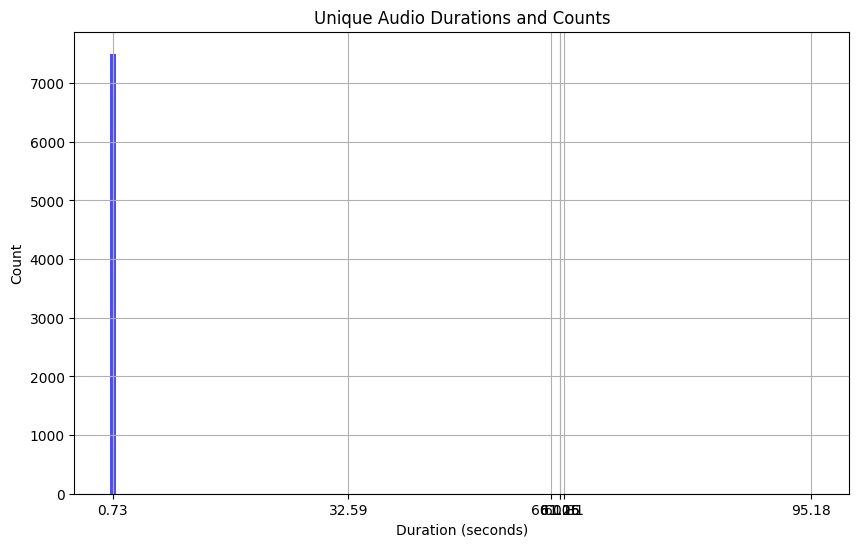

[ 0.72562358 32.58566893 60.         61.1555102  61.25387755 61.80571429
 95.18312925]


In [4]:
# Calculate the duration of each audio clip in seconds
audio_durations = [len(data) / sr for data in audio_data]

duration_counts = Counter(audio_durations)

unique_durations = list(duration_counts.keys())
counts = list(duration_counts.values())

print(counts)
# Create a bar chart to visualize unique audio durations and their counts
plt.figure(figsize=(10, 6))
plt.bar(unique_durations, counts, color='blue', alpha=0.7)
plt.title('Unique Audio Durations and Counts')
plt.xticks(np.unique(audio_durations))
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()
print((np.unique(audio_durations)))

#### Sample Rate Distribution

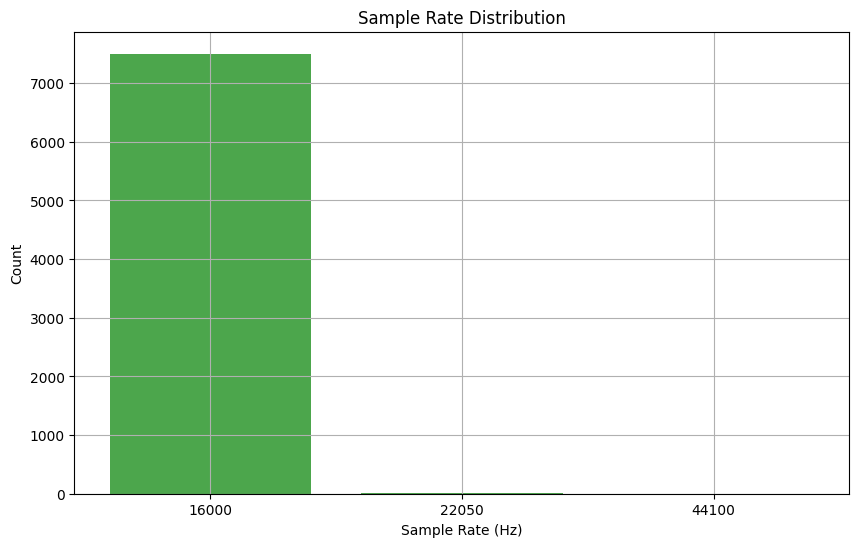

In [5]:
# Extract sample rates from the audio data
sample_rates = sr_audios

# Count the occurrences of each sample rate
sample_rate_counts = Counter(sample_rates)

# Extract unique sample rates and their counts
unique_sample_rates = list(sample_rate_counts.keys())

counts = list(sample_rate_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_sample_rates)), counts, color='green', alpha=0.7)
plt.title('Sample Rate Distribution')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Count')
plt.xticks(range(len(unique_sample_rates)), unique_sample_rates)  # Set custom X-axis labels
plt.grid(True)
plt.show()



In [6]:
print(unique_sample_rates)
print(counts)

[16000, 22050, 44100]
[7501, 5, 1]


In [7]:
invalid_sample_rate_paths = []


#### Pause And Silence

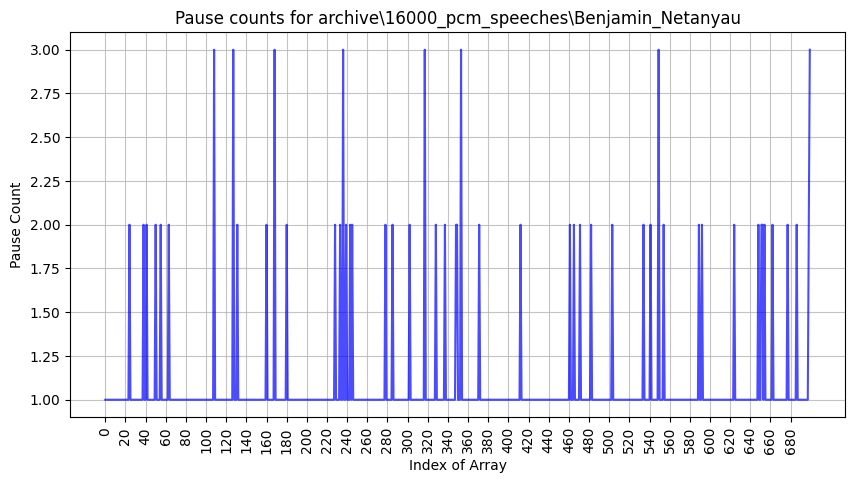

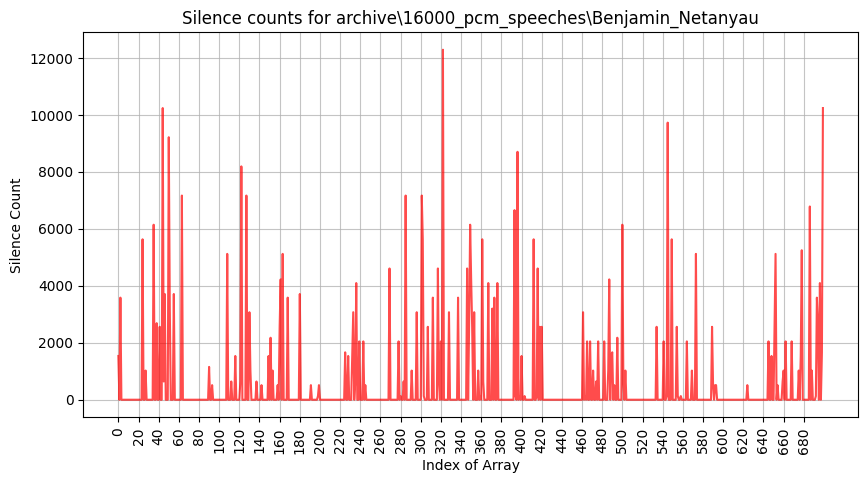

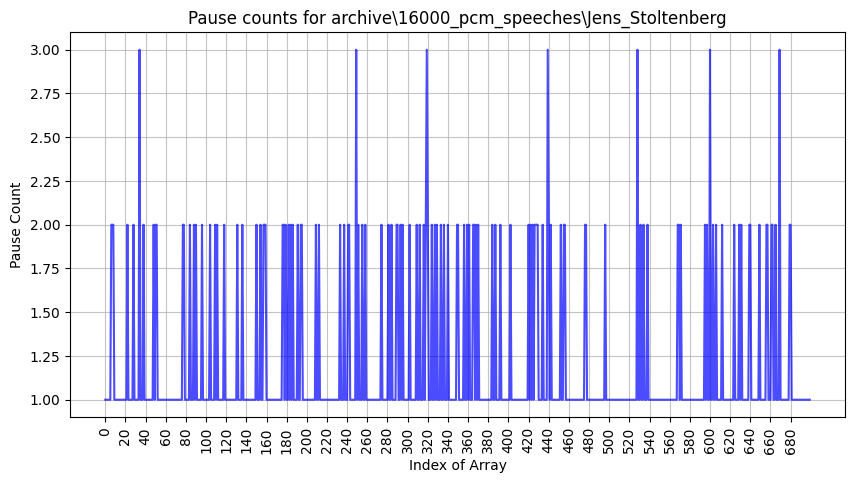

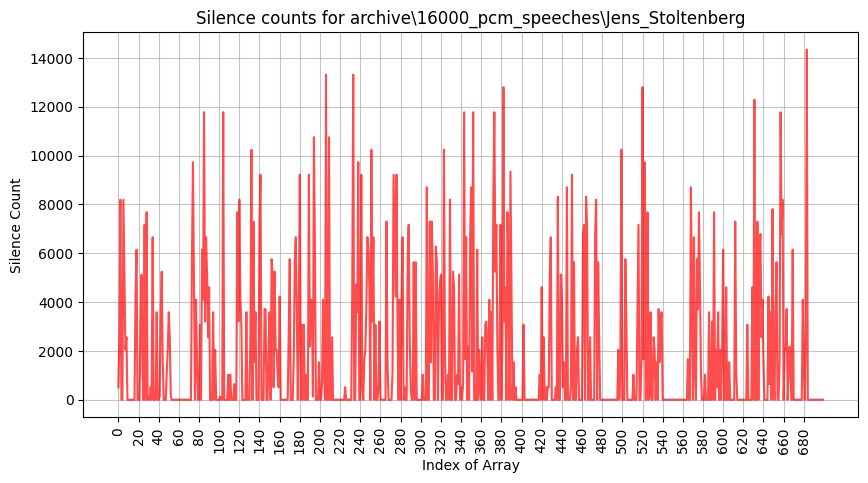

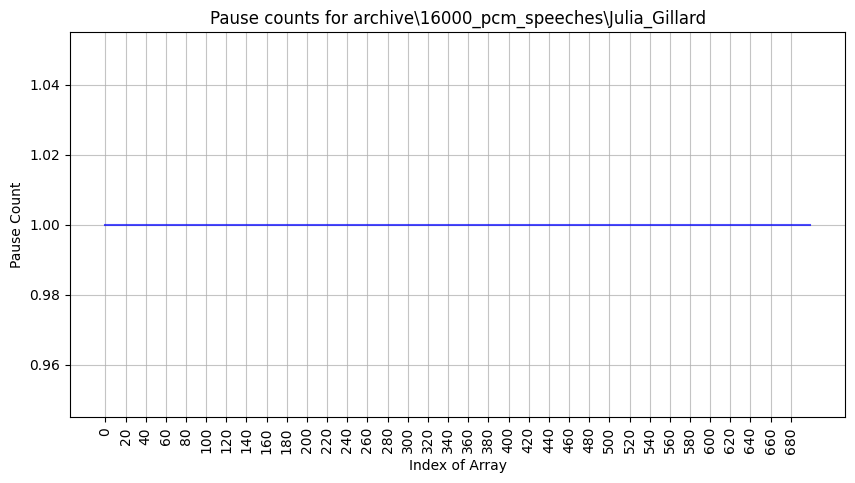

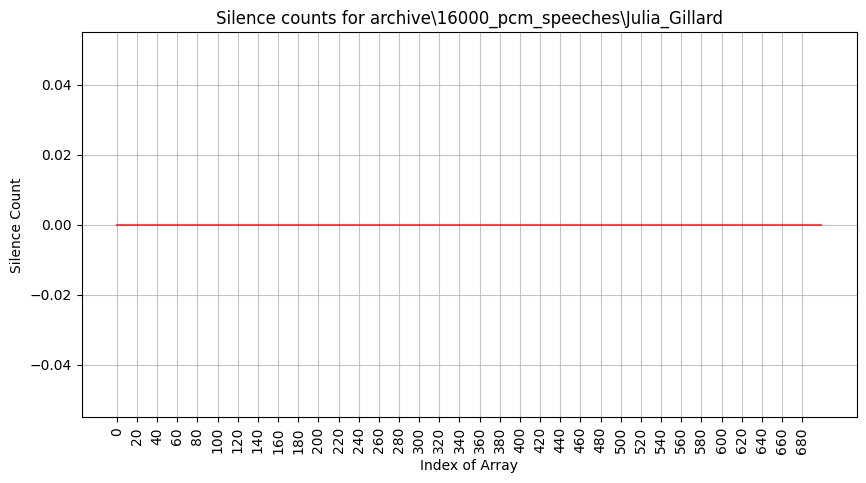

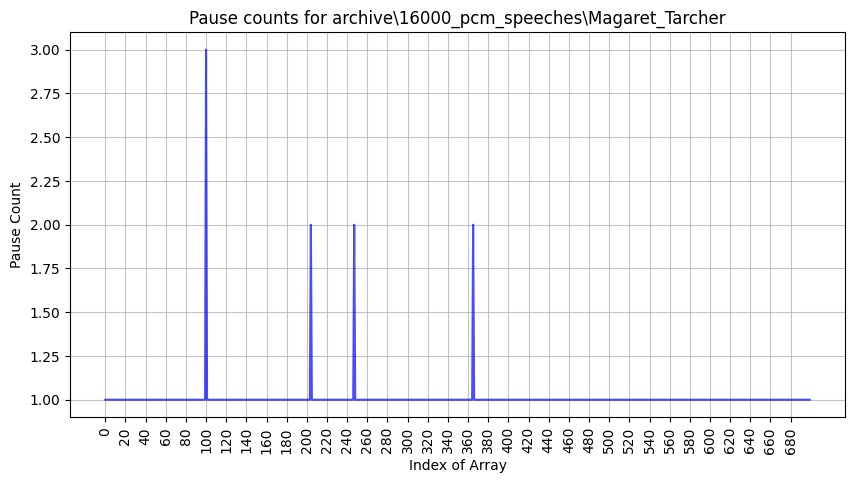

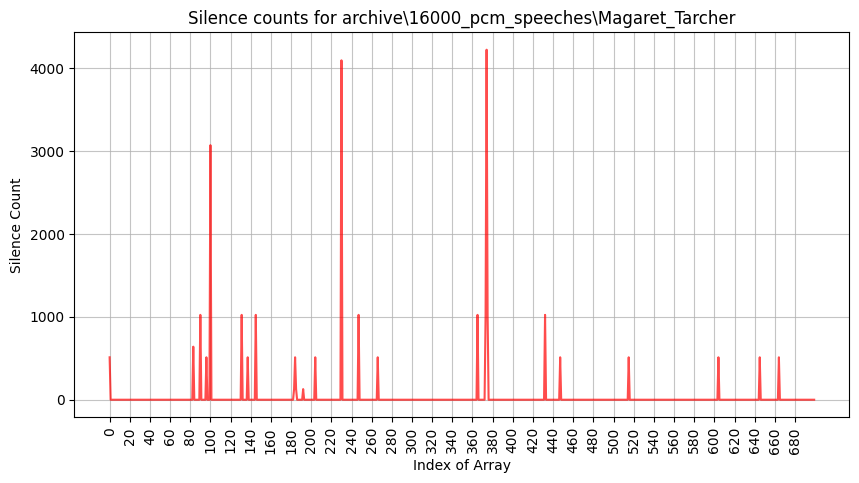

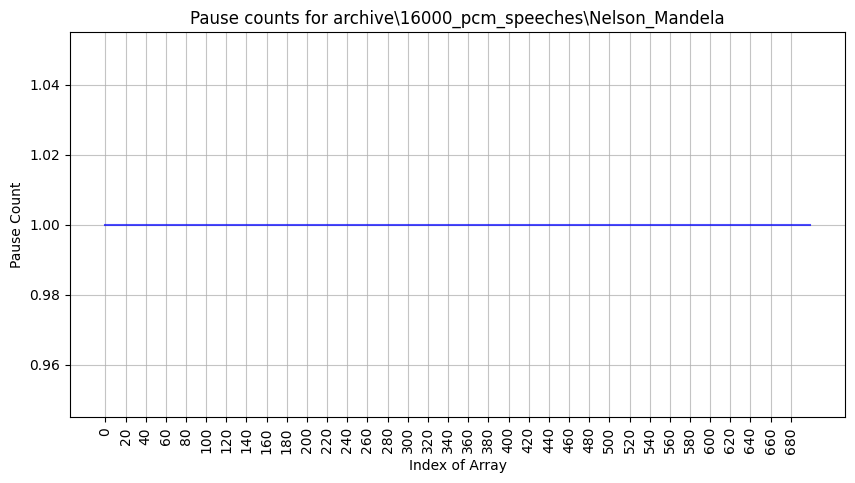

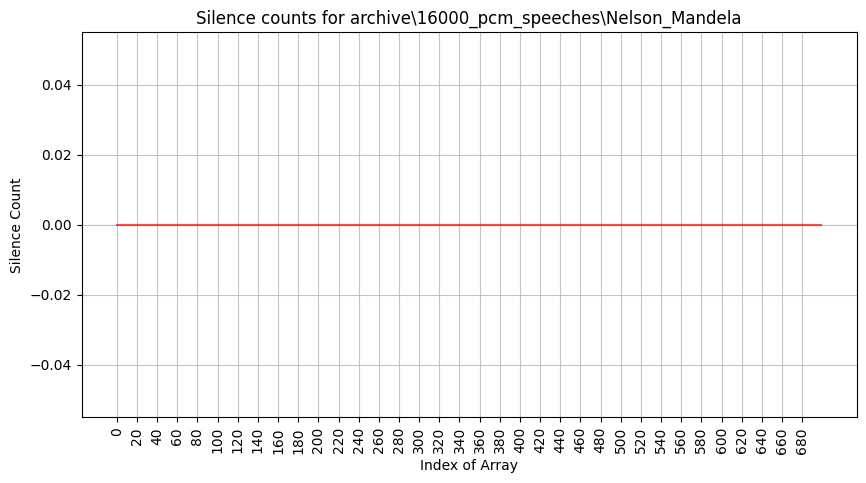

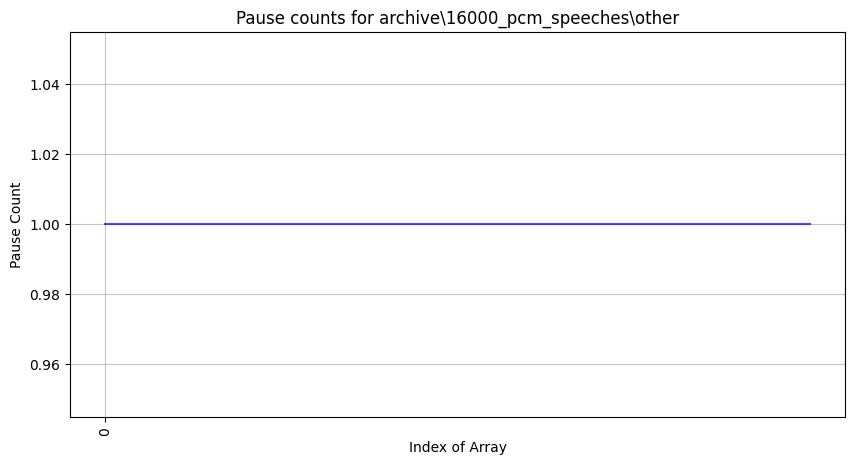

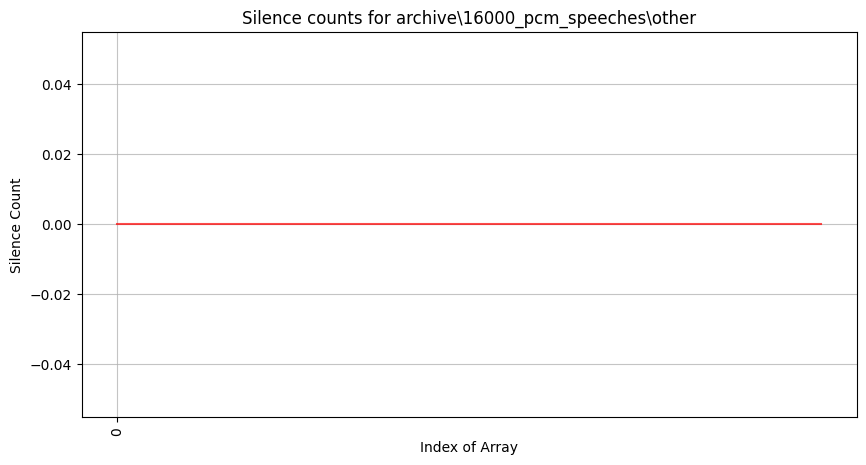

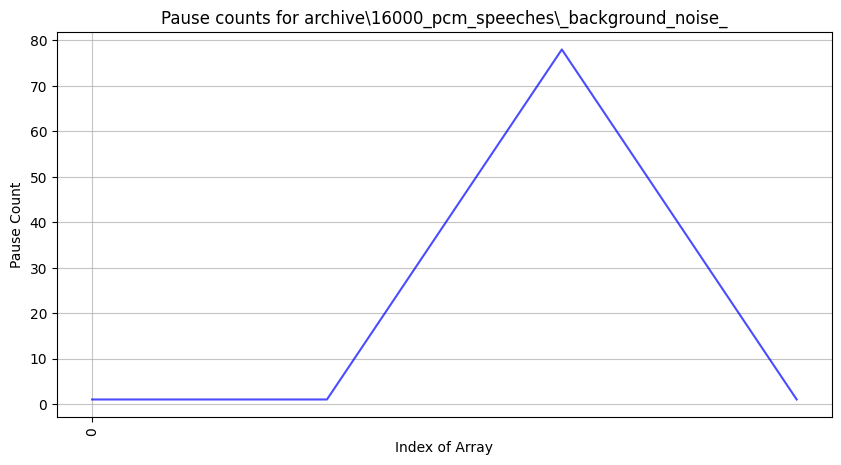

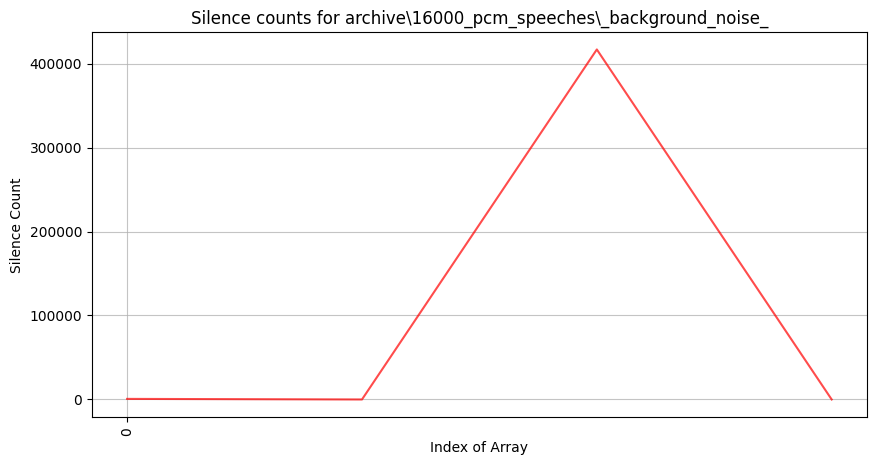

In [8]:

def plot_pause_and_silence_for_folder(folder_path):
    pause_counts = []  # Initialize outside the loop
    silence_counts = []  # Initialize outside the loop
    for root, dirs, files in os.walk(folder_path):
        file_indices = []
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                # Calculate intervals of non-silent audio segments
                intervals = librosa.effects.split(data, top_db=30)

                # Calculate pause and silence counts from intervals
                pause_counts.append(len(intervals))
                silence_counts.append(len(data) - sum([y - x for x, y in intervals]))

    # Consider the necessity of data limitation
    pause_counts = pause_counts[:700]
    silence_counts = silence_counts[:700]

    if pause_counts:
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(pause_counts)), pause_counts, color='b', alpha=0.7)  # Use line plot for time series data
        plt.title(f'Pause counts for {folder_path}')
        plt.xlabel('Index of Array')
        plt.ylabel('Pause Count')
        plt.xticks(range(0, len(pause_counts), 20), range(0, len(pause_counts), 20), rotation=90)
        plt.grid(axis='both', alpha=0.75)
        plt.show()

    if silence_counts:
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(silence_counts)), silence_counts, color='r', alpha=0.7)  # Use line plot for time series data
        plt.title(f'Silence counts for {folder_path}')
        plt.xlabel('Index of Array')
        plt.ylabel('Silence Count')
        plt.xticks(range(0, len(silence_counts), 20), range(0, len(silence_counts), 20), rotation=90)
        plt.grid(axis='both', alpha=0.75)
        plt.show()
for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_pause_and_silence_for_folder(entry.path)


#### Spectral Centroid in time domain

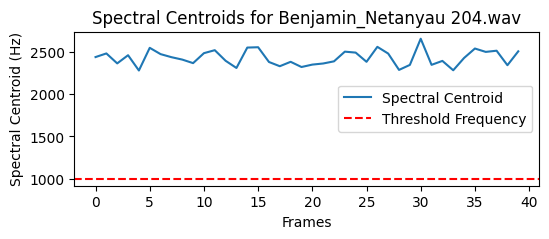

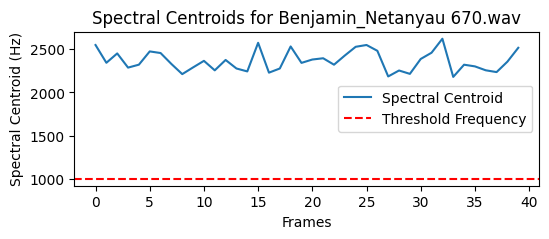

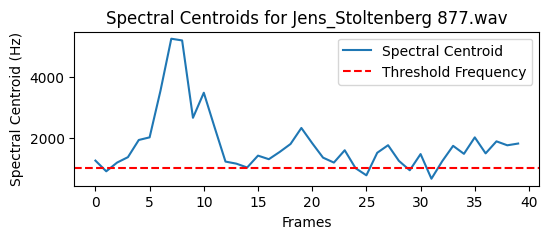

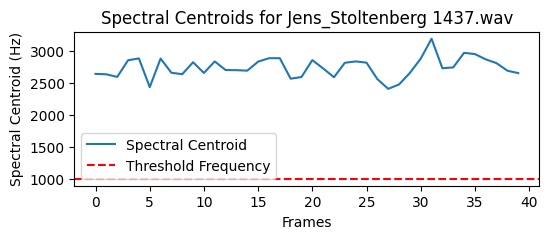

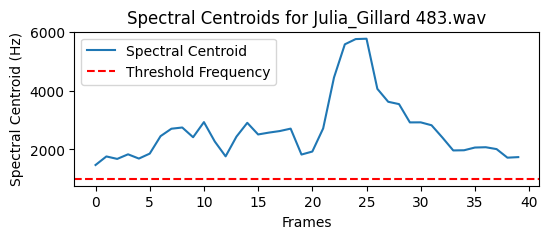

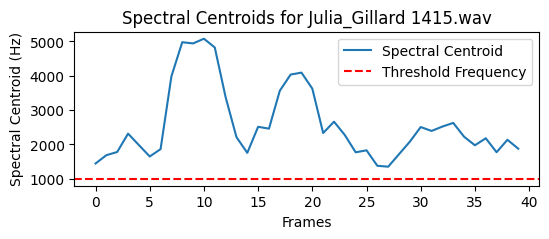

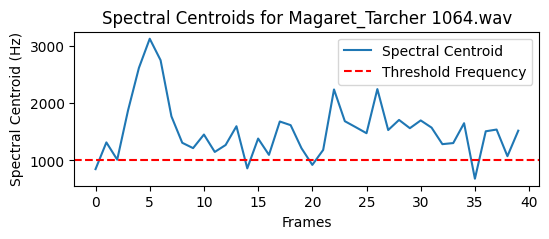

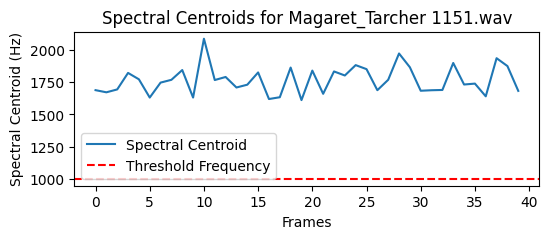

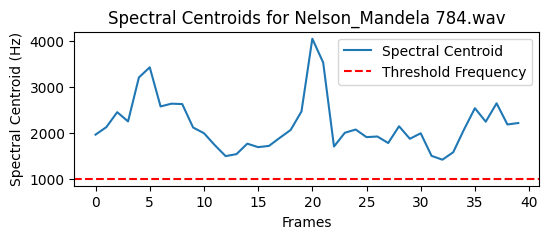

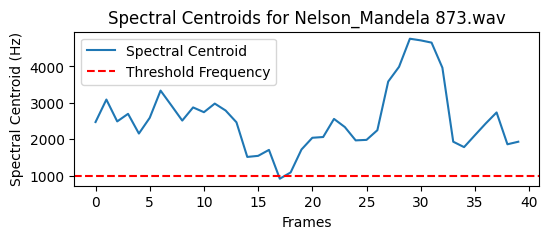

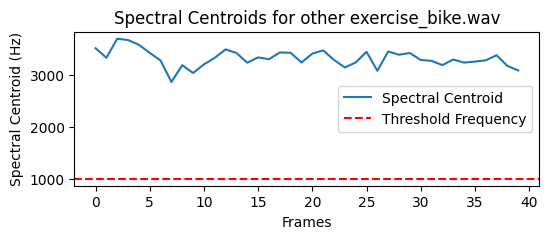

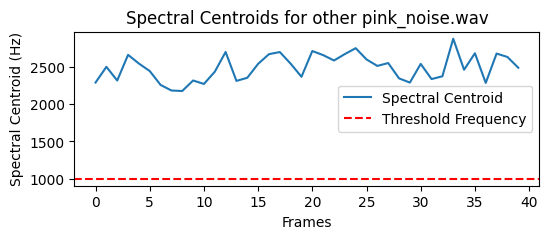

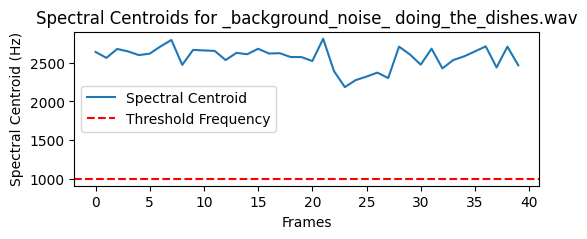

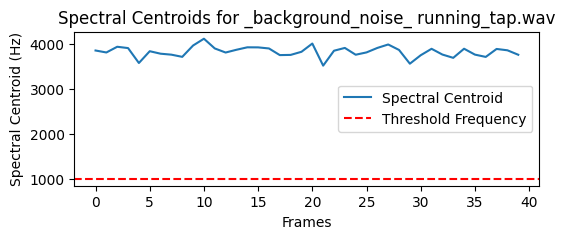

In [9]:

threshold_frequency = 1000
folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        window_size = 2048
        hop_length = 512
        spectral_centroids = []

        for i in range(0, len(y) - window_size, hop_length):
            window = y[i: i + window_size]
            stft = librosa.stft(window)
            magnitude = np.abs(stft)
            spectral_centroid = librosa.feature.spectral_centroid(S=magnitude, sr=sr)[0][0]  # Considering the first value
            spectral_centroids.append(spectral_centroid)

        plt.figure(figsize=(6, 2))
        plt.plot(range(len(spectral_centroids[:40])), spectral_centroids[:40], label='Spectral Centroid')  # Modify here
        plt.axhline(y=threshold_frequency, color='r', linestyle='--', label='Threshold Frequency')
        plt.title(f'Spectral Centroids for {folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('Spectral Centroid (Hz)')
        plt.legend()
        plt.show()


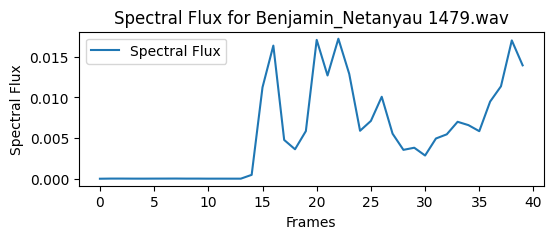

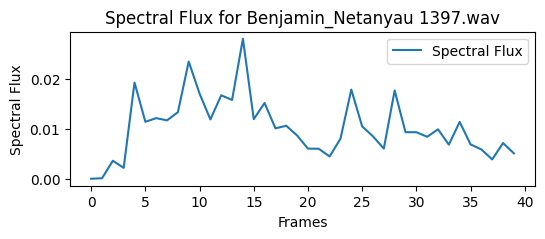

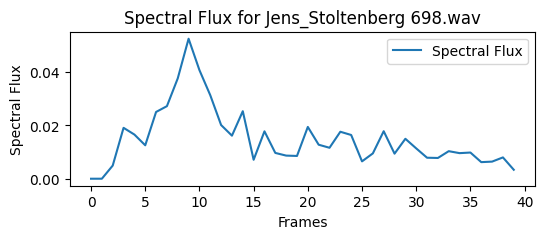

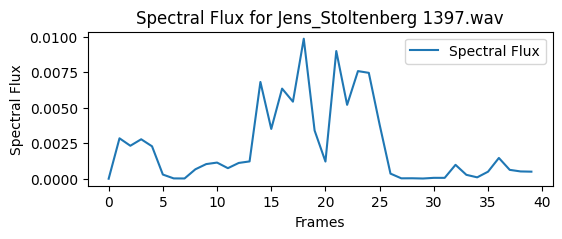

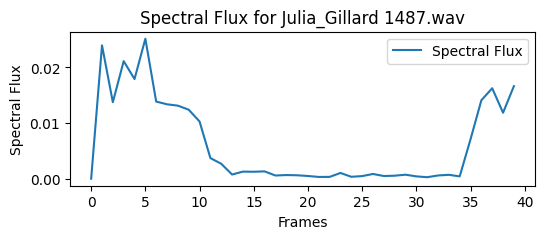

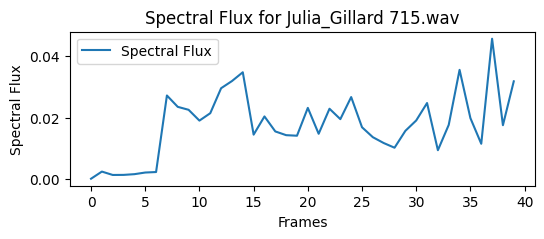

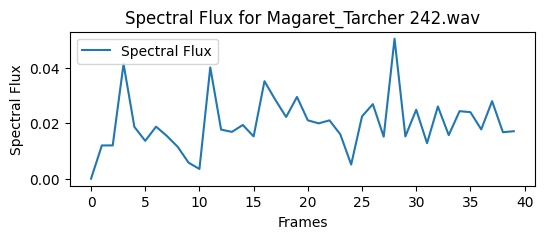

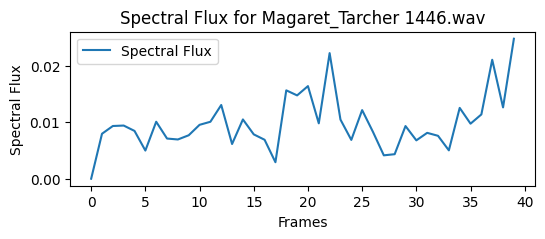

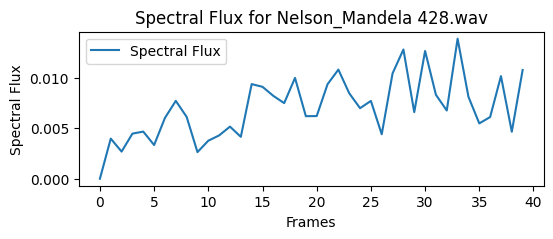

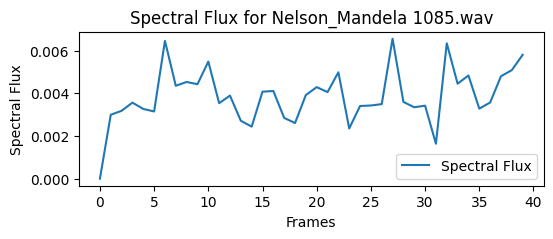

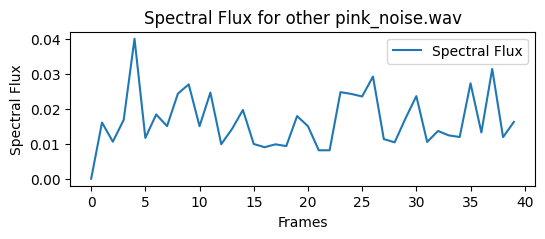

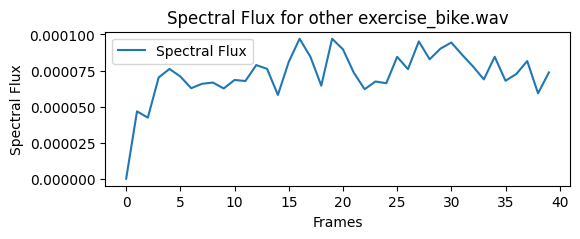

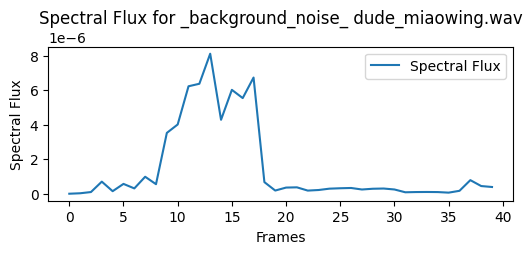

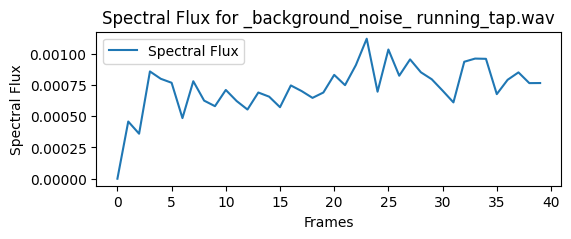

In [11]:

threshold_frequency = 1000
folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

def spectral_flux(window, prev_window, W):
    EN = np.abs(np.fft.fft(window))[:W] / W
    EN_prev = np.abs(np.fft.fft(prev_window))[:W] / W
    diff = np.square(EN - EN_prev)
    return np.sum(diff)

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        window_size = 2048
        hop_length = 512
        spectral_flux_values = []
        stft_spectrogram = []

        prev_window = y[:window_size]

        for i in range(0, len(y) - window_size, hop_length):
            window = y[i: i + window_size]

            # Compute spectral flux
            W = len(window)
            spectral_flux_value = spectral_flux(window, prev_window, W)
            spectral_flux_values.append(spectral_flux_value)
            prev_window = window

        plt.figure(figsize=(6, 2))

        plt.plot(range(len(spectral_flux_values[:40])), spectral_flux_values[:40], label='Spectral Flux')  
        plt.title(f'Spectral Flux for {folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('Spectral Flux')
        plt.legend()

        plt.show()


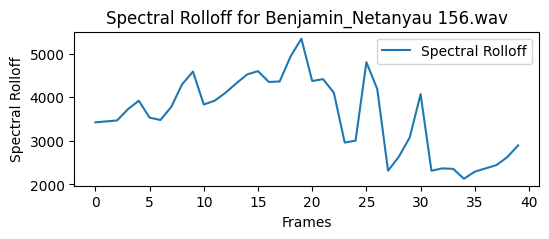

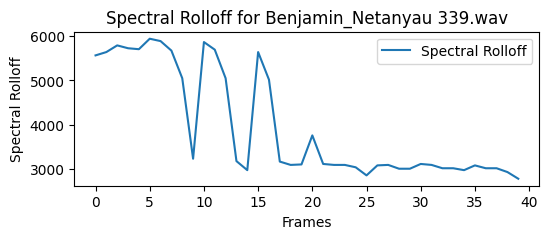

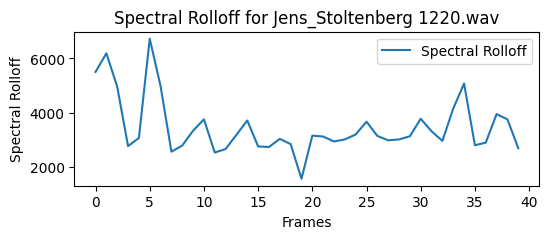

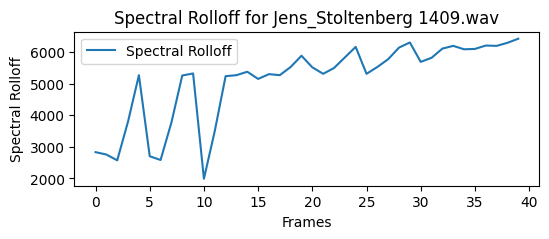

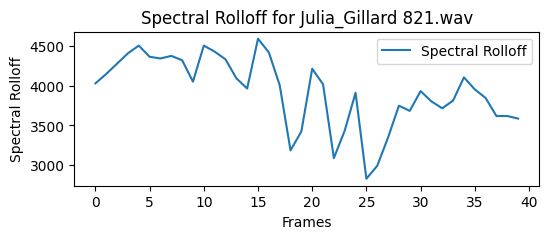

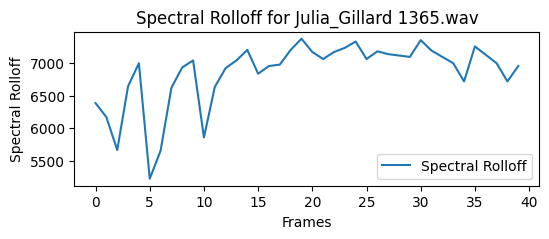

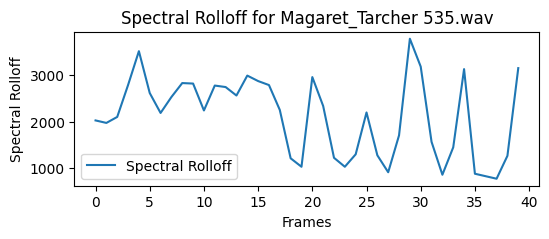

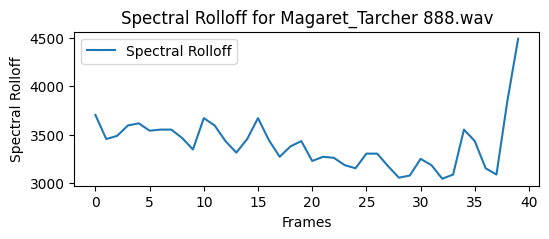

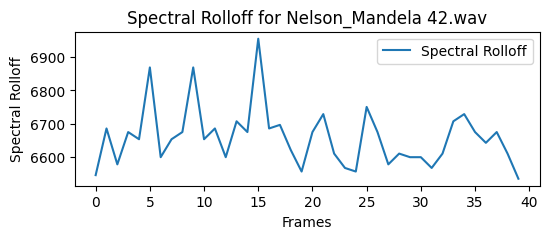

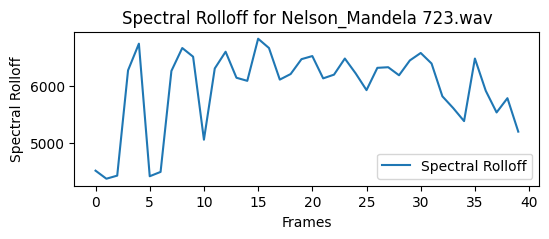

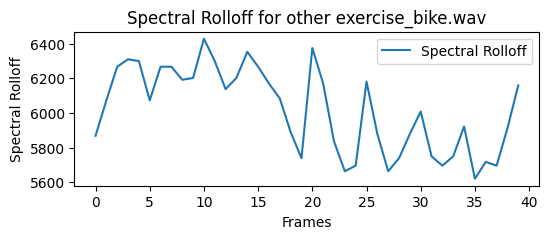

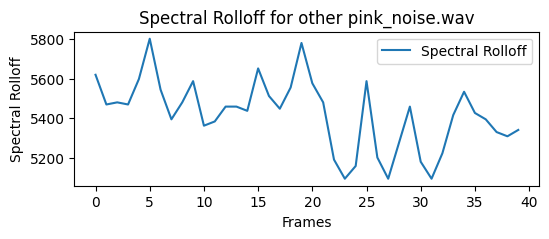

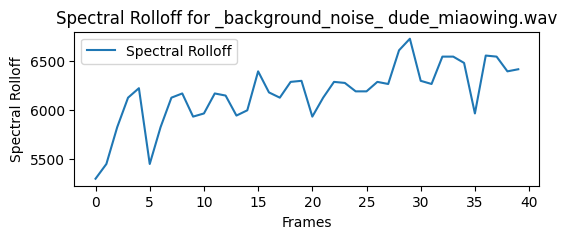

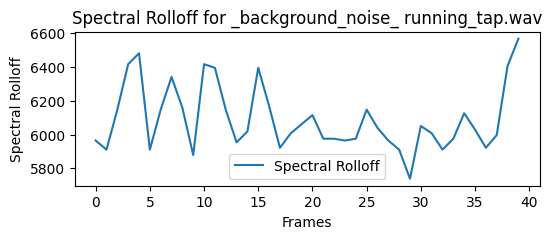

In [13]:

threshold_frequency = 1000
folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

def spectral_rolloff(y, sr, roll_percent=0.85):
    stft = np.abs(librosa.stft(y))
    spectral_rolloff_val = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=roll_percent)
    return spectral_rolloff_val

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        window_size = 2048
        hop_length = 512
        spectral_rolloff_values = []

        for i in range(0, len(y) - window_size, hop_length):
            window = y[i: i + window_size]

            # Compute spectral rolloff
            spectral_rolloff_value = spectral_rolloff(window, sr)
            spectral_rolloff_values.append(spectral_rolloff_value)

        spectral_rolloff_values = np.array(spectral_rolloff_values).flatten()  # Flatten the 2D array

        plt.figure(figsize=(6, 2))

        plt.plot(range(len(spectral_rolloff_values[:40])), spectral_rolloff_values[:40], label='Spectral Rolloff')  
        plt.title(f'Spectral Rolloff for {folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('Spectral Rolloff')
        plt.legend()

        plt.show()


Spectral centroid in time domain

##### Spectral Flux

#### Spectral flux in time domain

##### Spectral Rolloff

#### Amplitude Envelope

#### Amplitude plotting

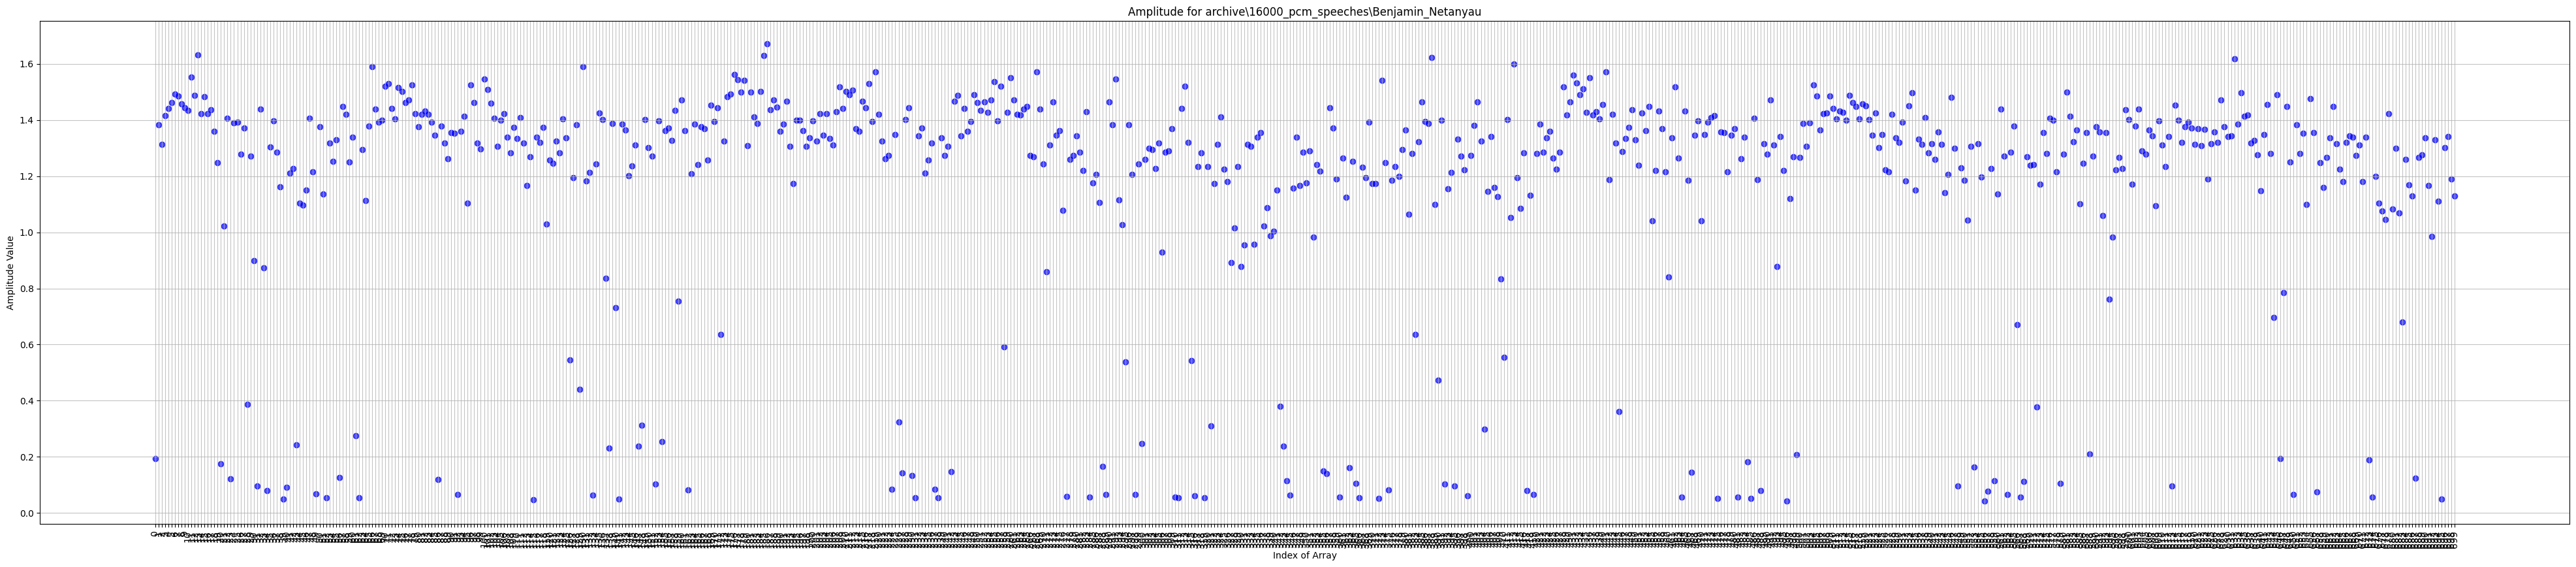

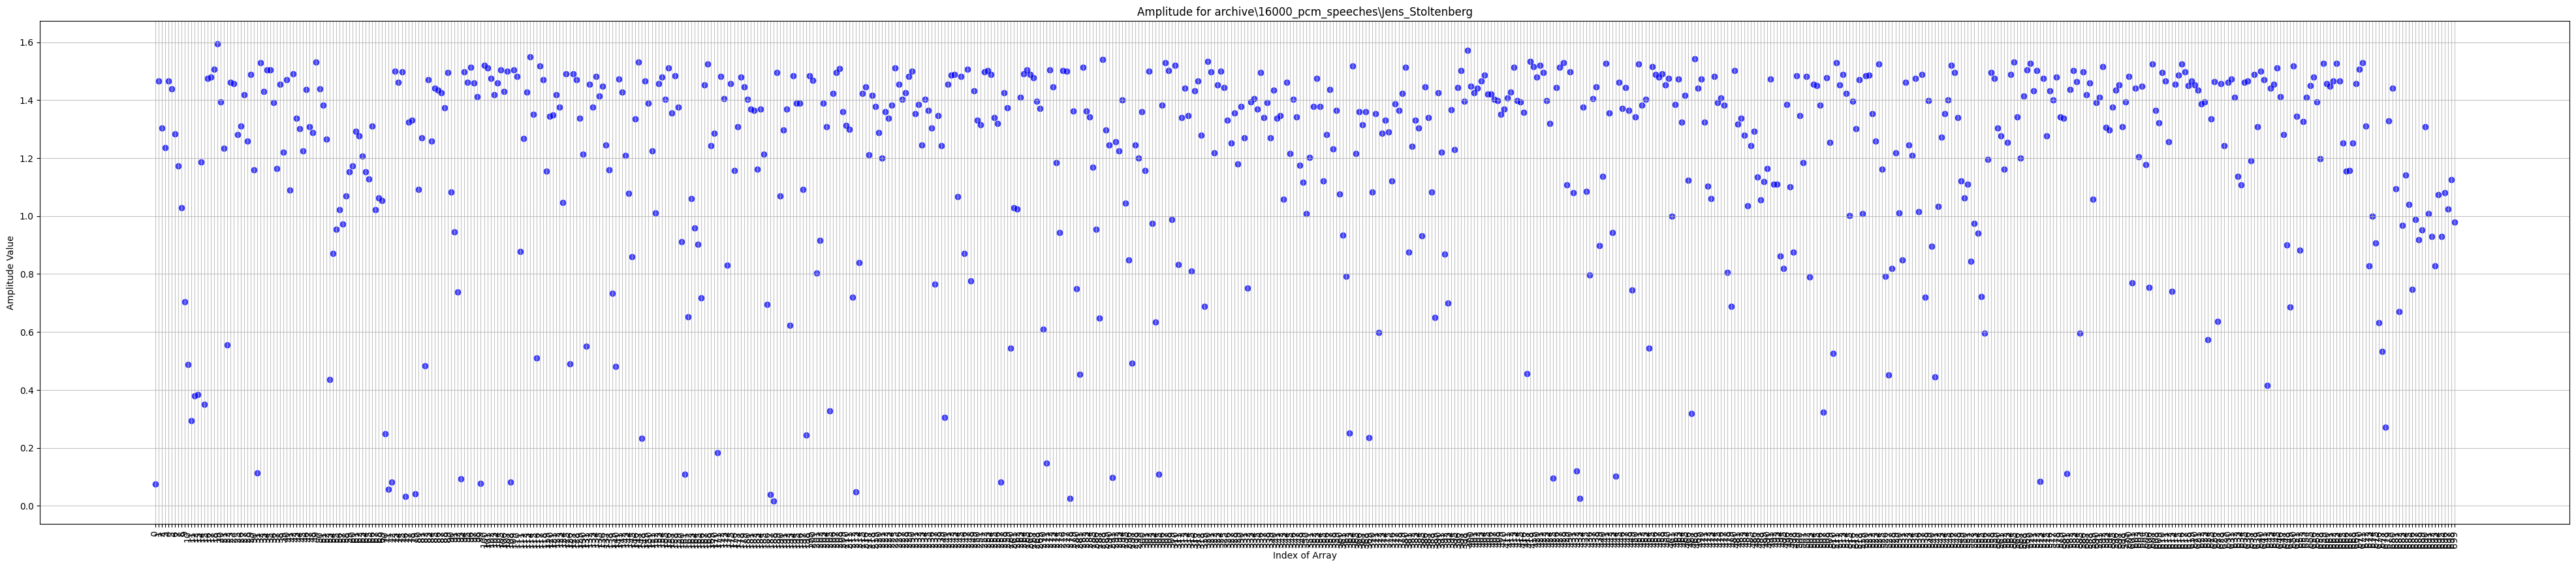

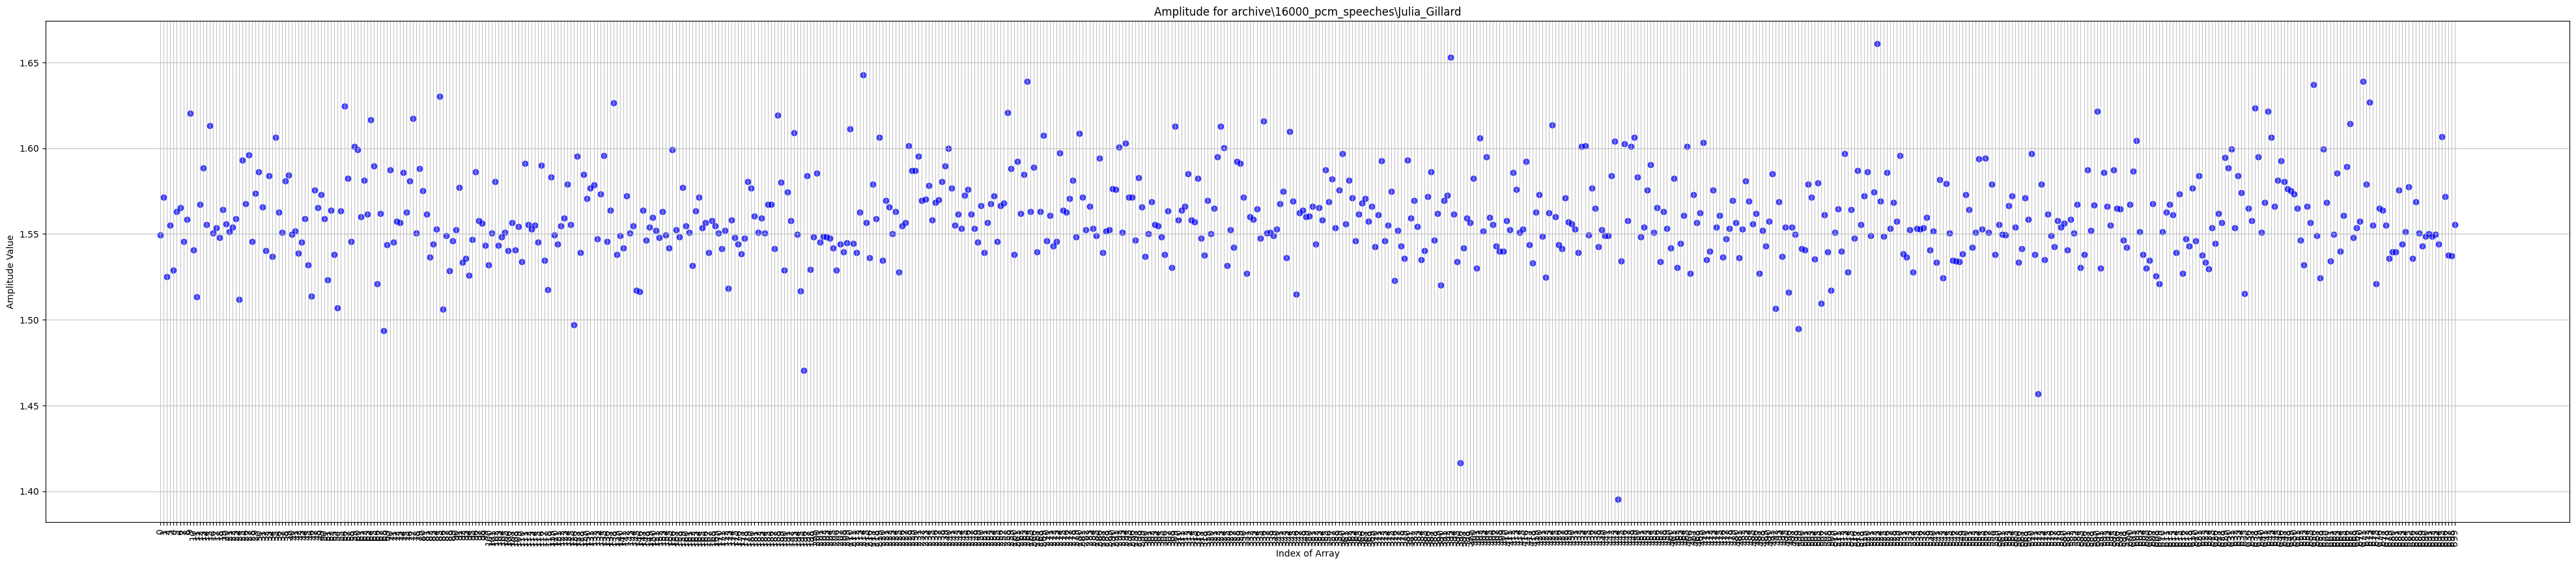

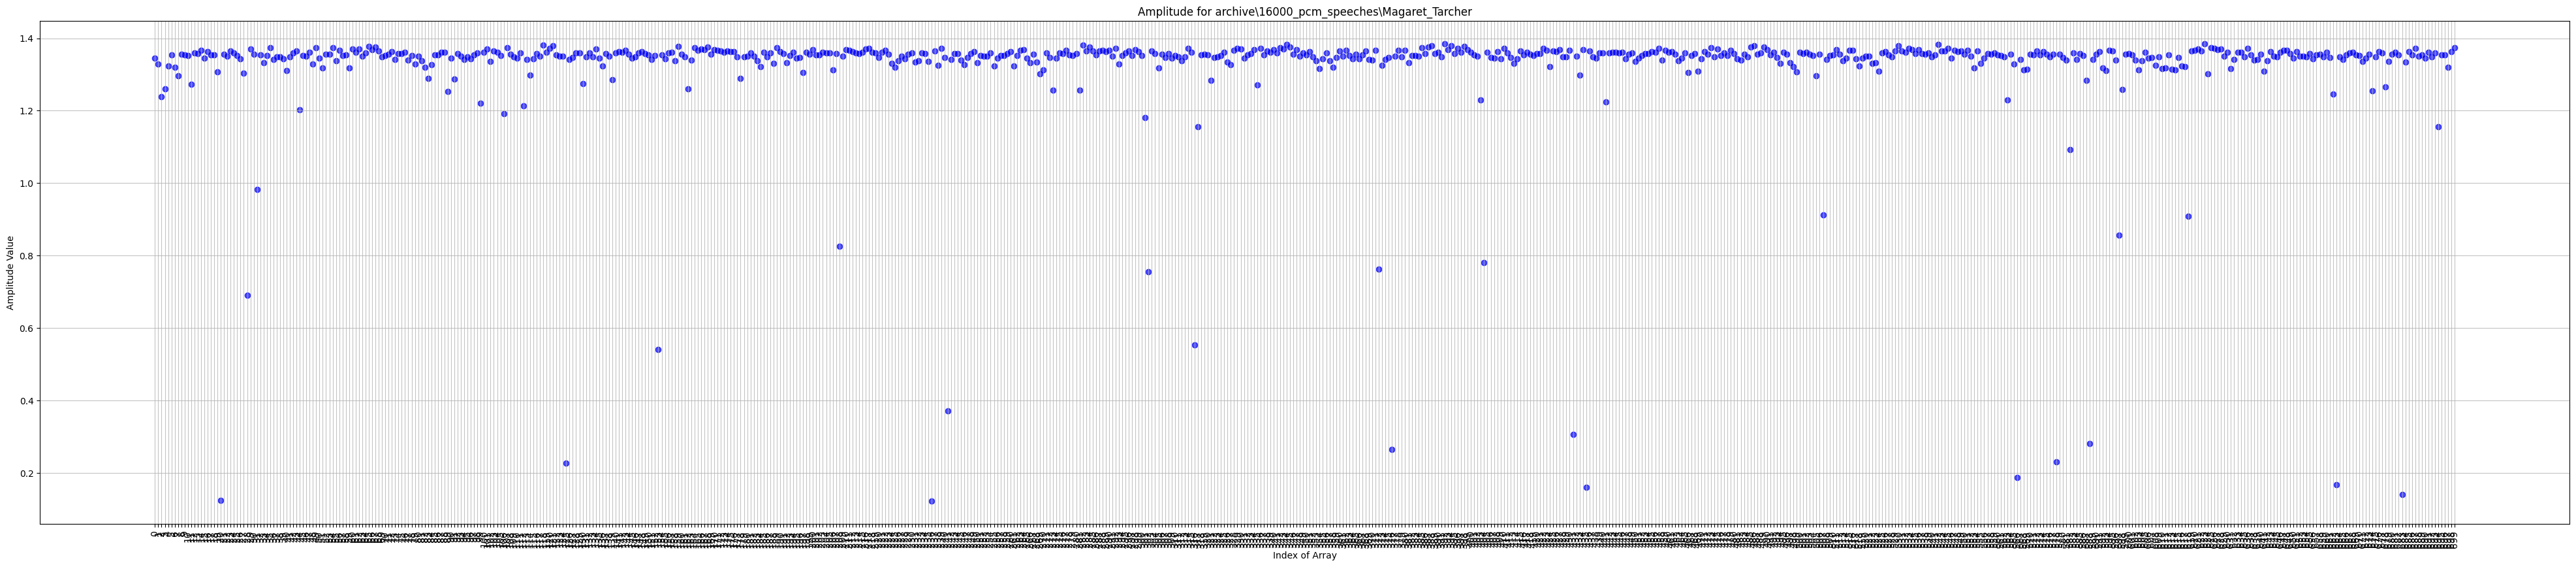

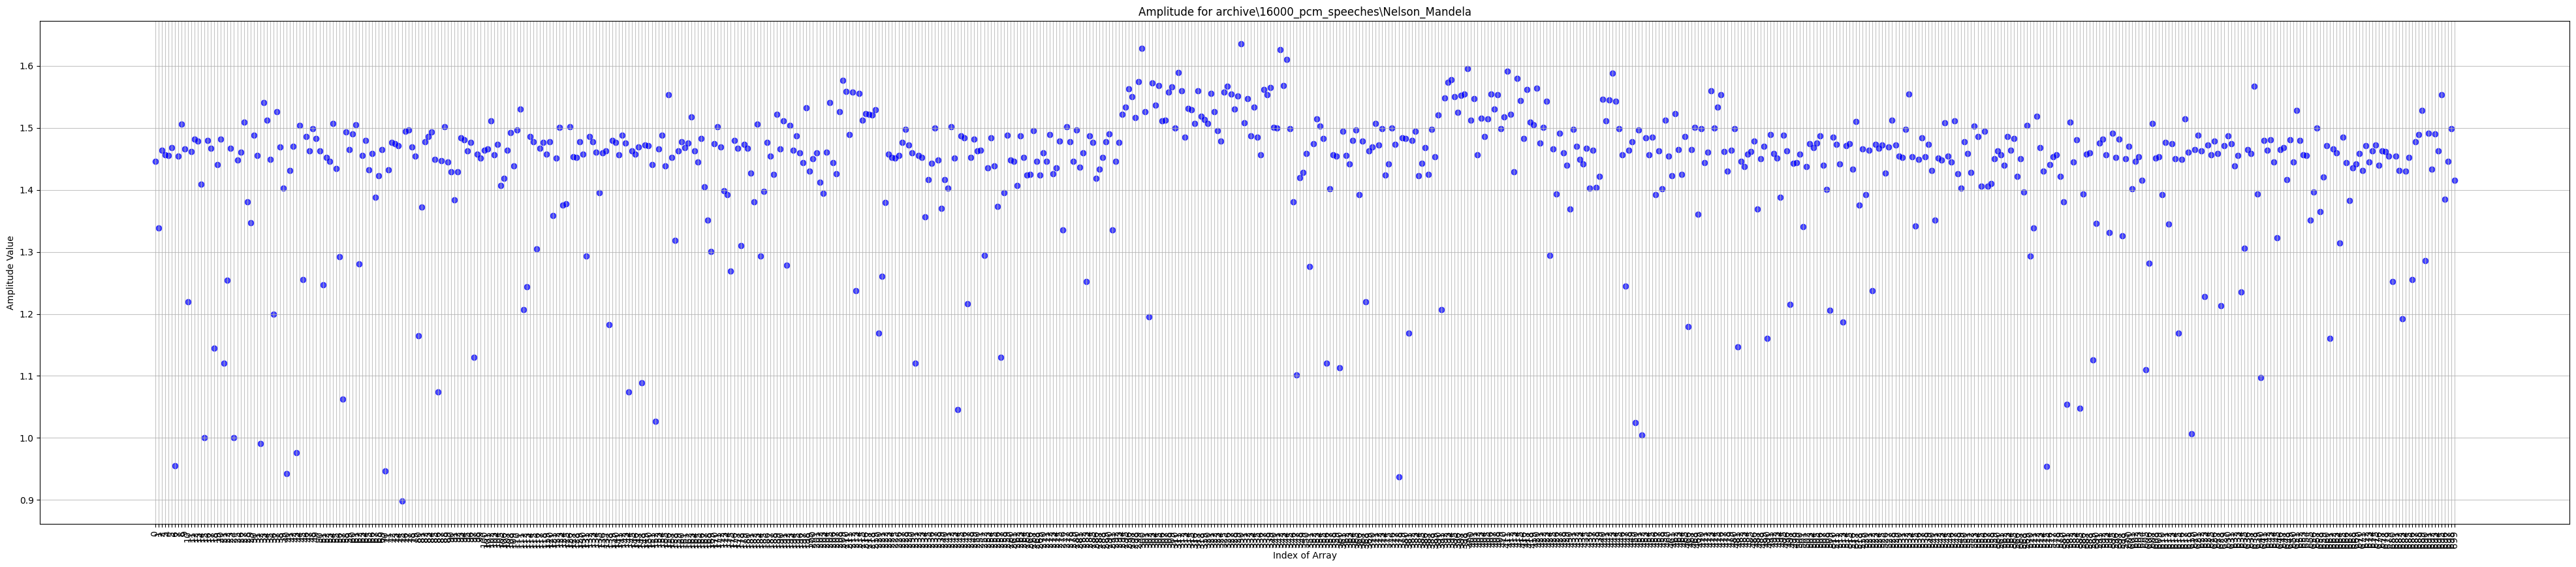

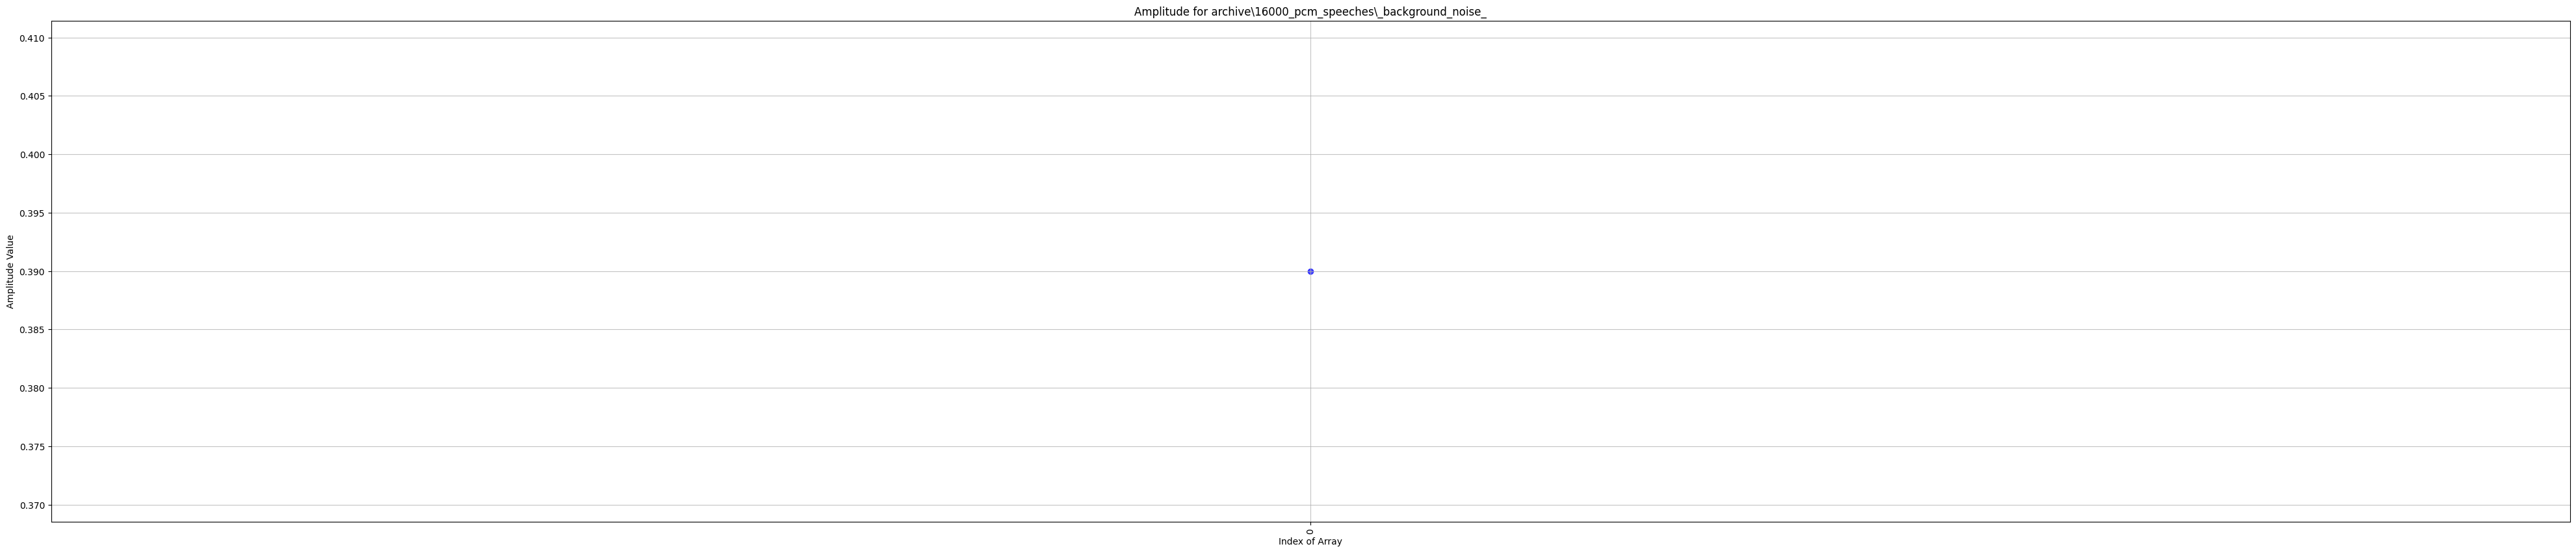

In [14]:
import re
def plot_amplitude_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        amplitude_values = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                # Calculate amplitude
                amplitude = max(data) - min(data)
                match = re.match(r'(\d+)', file)
                if match:
                    file_index = int(match.group(1))
                    file_indices.append(file_index)
                    amplitude_values.append(amplitude)
        amplitude_values = amplitude_values[:700] 
        
        if amplitude_values:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(amplitude_values)), amplitude_values, color='b', alpha=0.7)  # Using scatter plot
            plt.title(f'Amplitude for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Amplitude Value')
            plt.xticks(range(len(amplitude_values)), range(len(amplitude_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75)
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_amplitude_for_folder(entry.path)


In [15]:
for root, dirs, files in os.walk(audio_files_dir):
    print(root, files)       

archive\16000_pcm_speeches ['tf_Wav_reader.py']
archive\16000_pcm_speeches\Benjamin_Netanyau ['0.wav', '1.wav', '10.wav', '100.wav', '1000.wav', '1001.wav', '1002.wav', '1003.wav', '1004.wav', '1005.wav', '1006.wav', '1007.wav', '1008.wav', '1009.wav', '101.wav', '1010.wav', '1011.wav', '1012.wav', '1013.wav', '1014.wav', '1015.wav', '1016.wav', '1017.wav', '1018.wav', '1019.wav', '102.wav', '1020.wav', '1021.wav', '1022.wav', '1023.wav', '1024.wav', '1025.wav', '1026.wav', '1027.wav', '1028.wav', '1029.wav', '103.wav', '1030.wav', '1031.wav', '1032.wav', '1033.wav', '1034.wav', '1035.wav', '1036.wav', '1037.wav', '1038.wav', '1039.wav', '104.wav', '1040.wav', '1041.wav', '1042.wav', '1043.wav', '1044.wav', '1045.wav', '1046.wav', '1047.wav', '1048.wav', '1049.wav', '105.wav', '1050.wav', '1051.wav', '1052.wav', '1053.wav', '1054.wav', '1055.wav', '1056.wav', '1057.wav', '1058.wav', '1059.wav', '106.wav', '1060.wav', '1061.wav', '1062.wav', '1063.wav', '1064.wav', '1065.wav', '1066.wav

#### Spectral Bandwidth/Spread in time domain

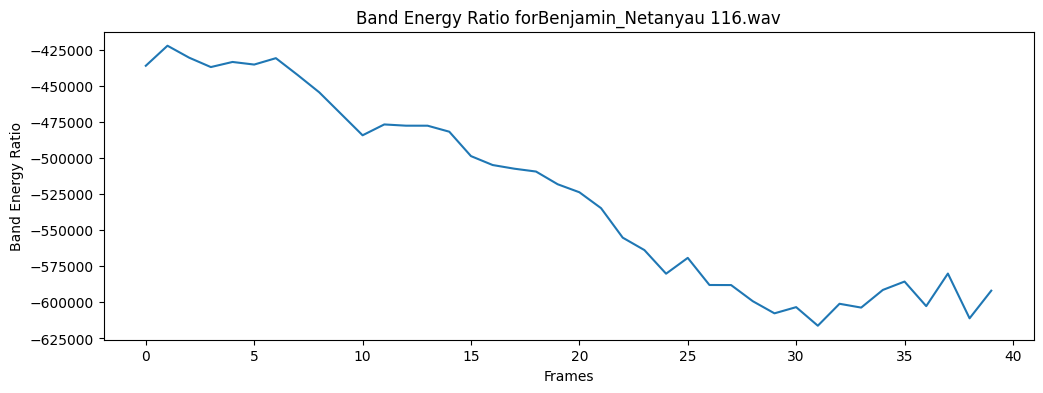

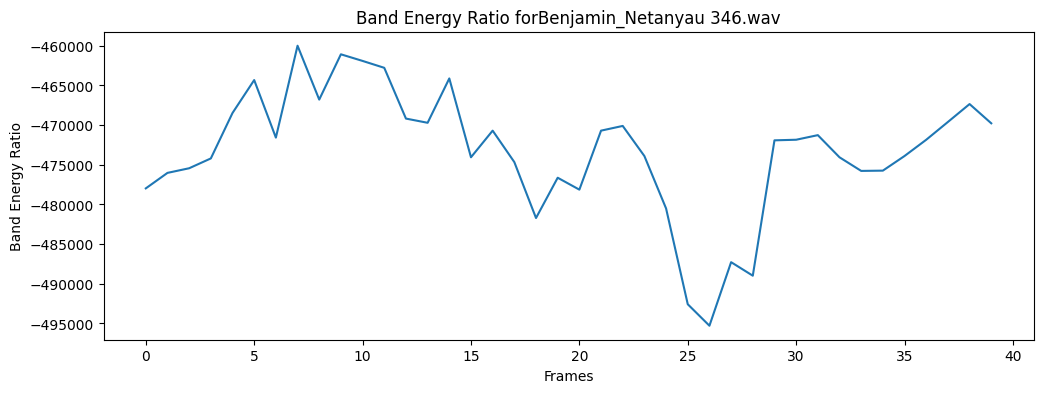

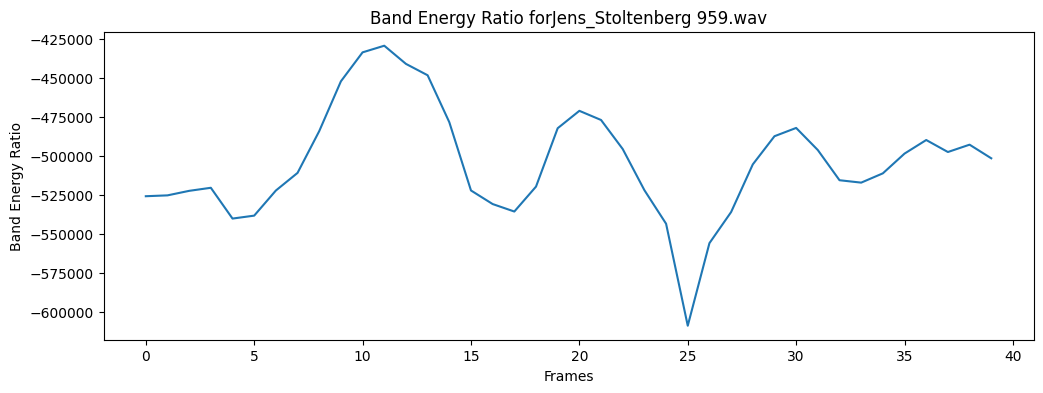

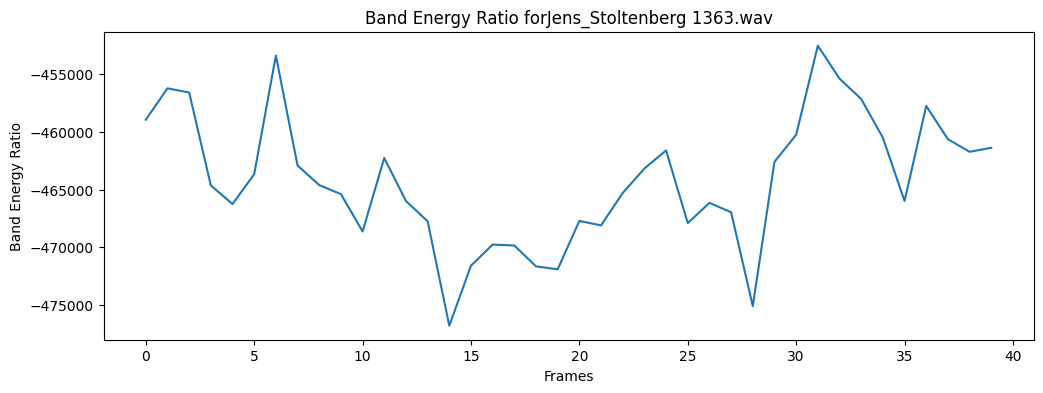

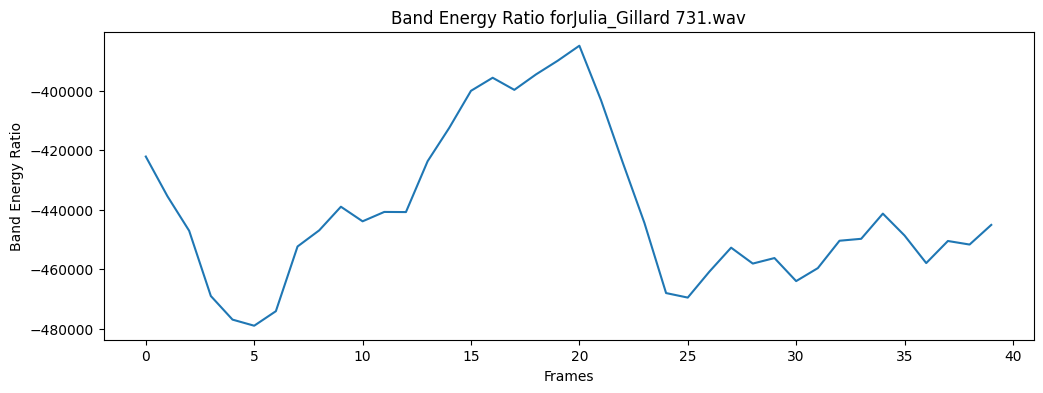

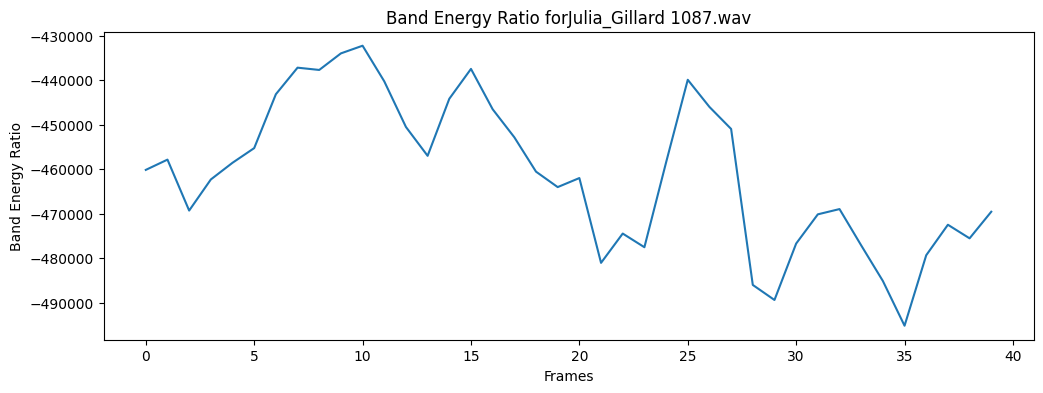

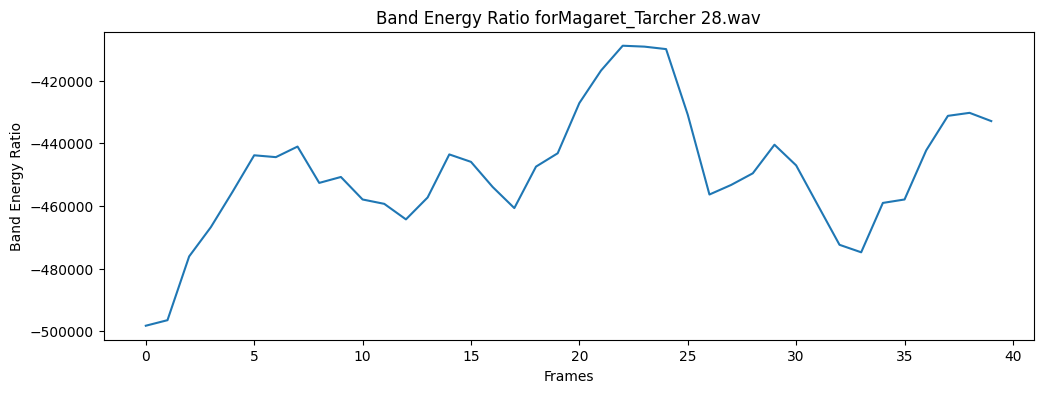

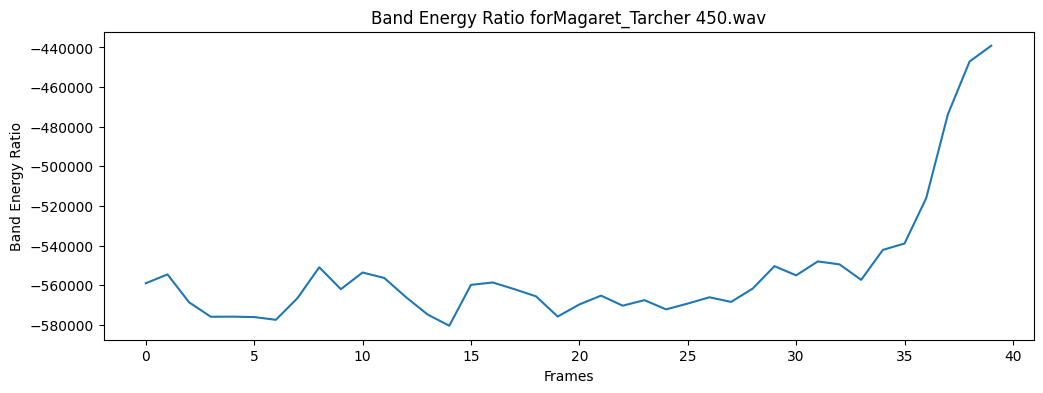

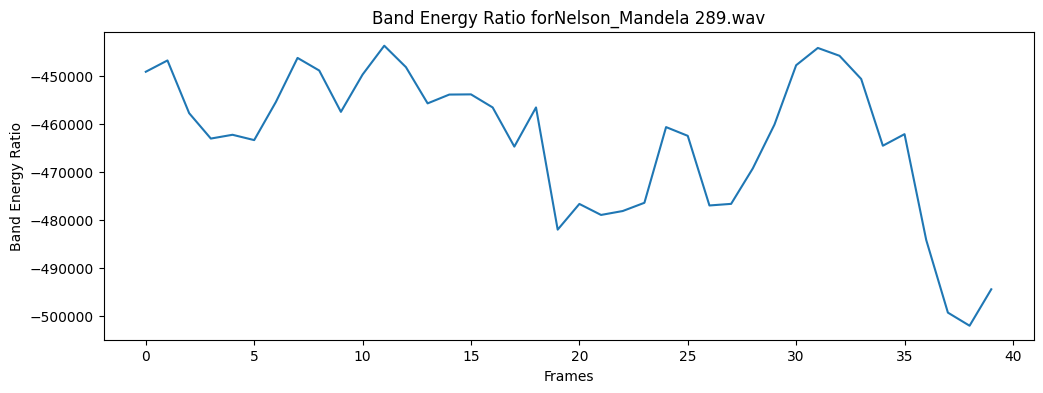

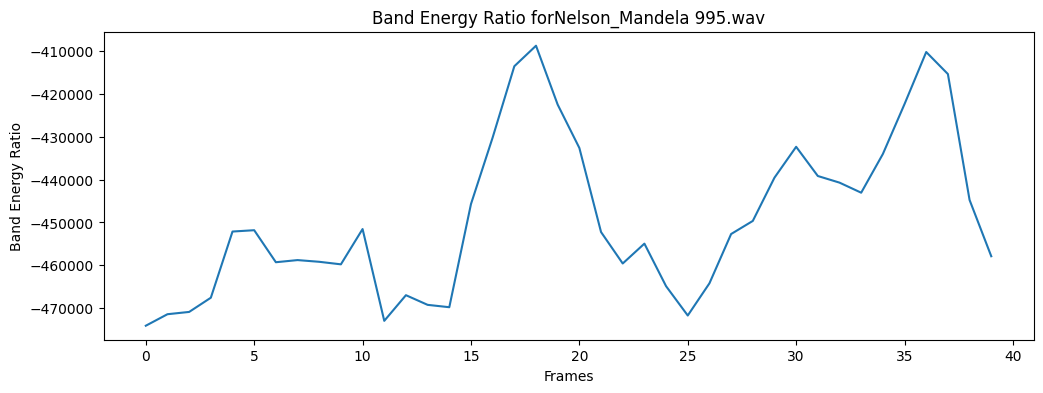

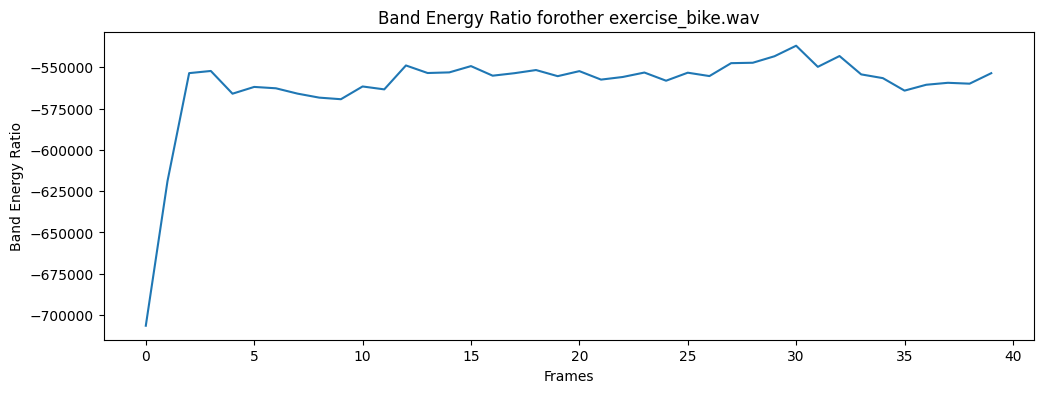

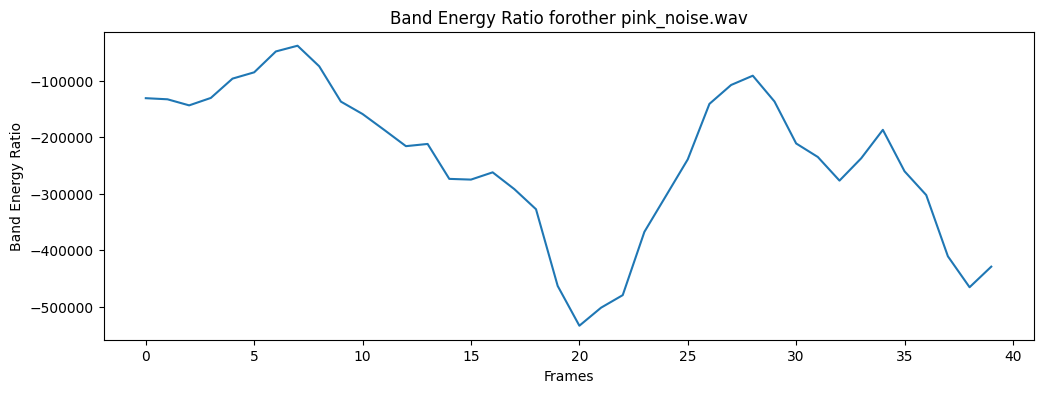

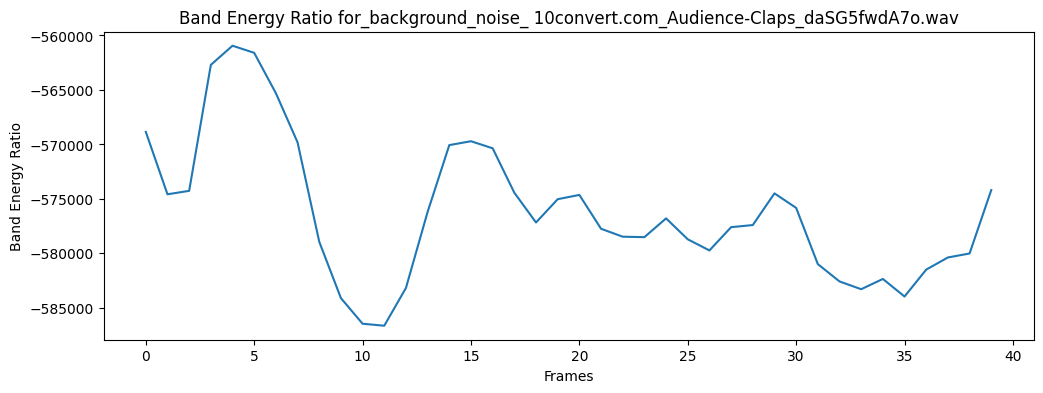

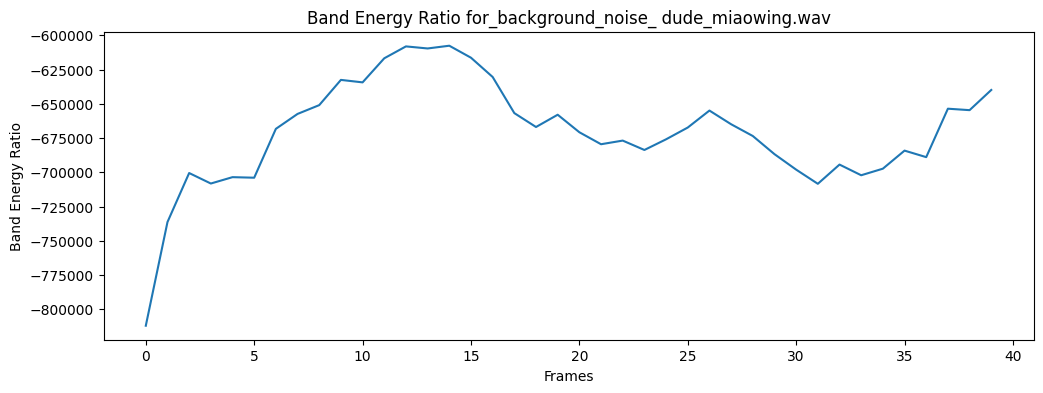

In [16]:
def calculate_band_energy(signal, sample_rate, lower_band_edge, upper_band_edge):


  # Compute the spectral energy density of the signal.
  spectral_energy_density = librosa.core.power_to_db(signal)

  # Integrate the spectral energy density over the desired frequency band.
  band_energy = np.trapz(spectral_energy_density[lower_band_edge:upper_band_edge], x=np.linspace(lower_band_edge, upper_band_edge, len(spectral_energy_density[lower_band_edge:upper_band_edge])))

  return band_energy


folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        window_size = 2048
        hop_length = 512
        energy_ratios = []

        for i in range(0, len(y) - window_size, hop_length):
            window = y[i: i + window_size]
            stft = np.abs(librosa.stft(window))

            # Calculate the band energy ratio using the calculate_band_energy() function.
            band_energy_ratio = calculate_band_energy(window, sr, 20, 10000)

            energy_ratios.append(band_energy_ratio)

        plt.figure(figsize=(12, 4))
        plt.plot(energy_ratios[:40])
        plt.title(f'Band Energy Ratio for{folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('Band Energy Ratio')

        plt.show()


## Spectral Spread in Frequency domain

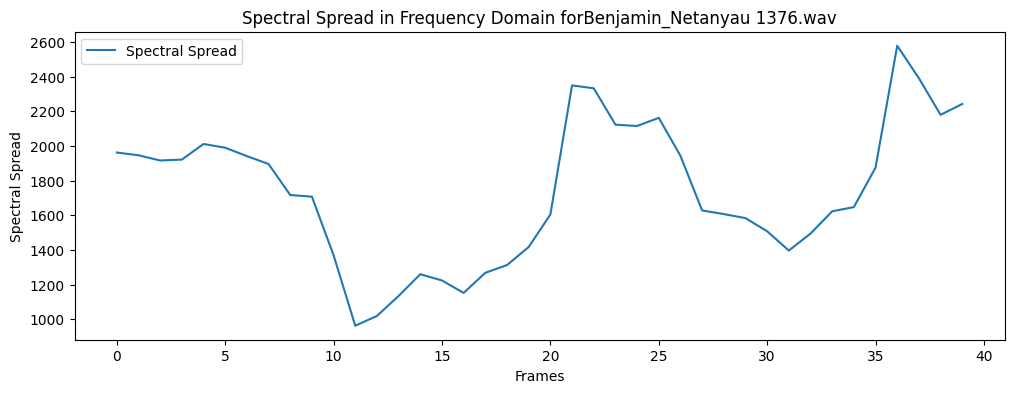

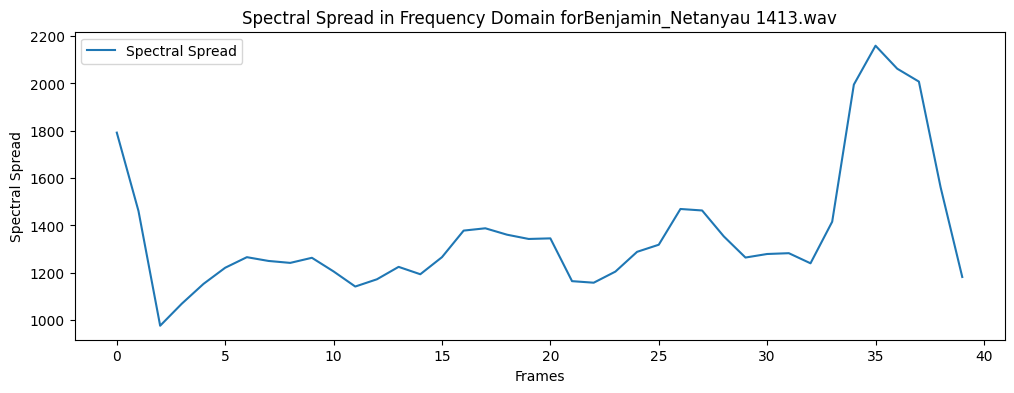

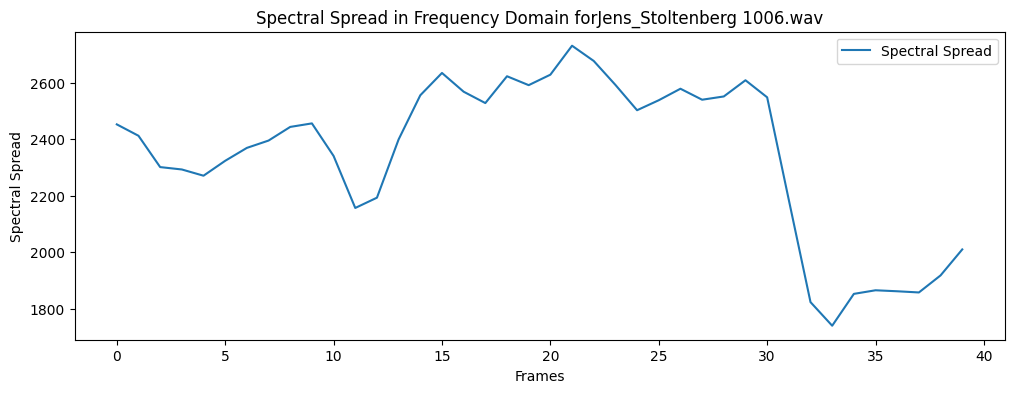

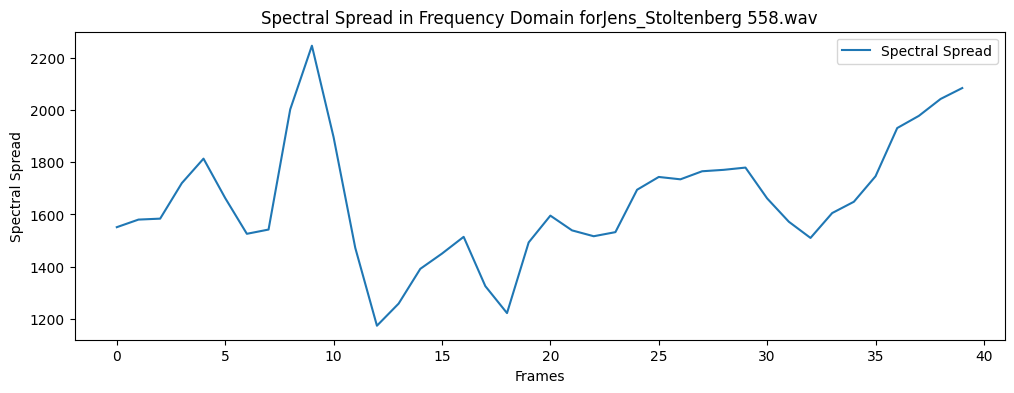

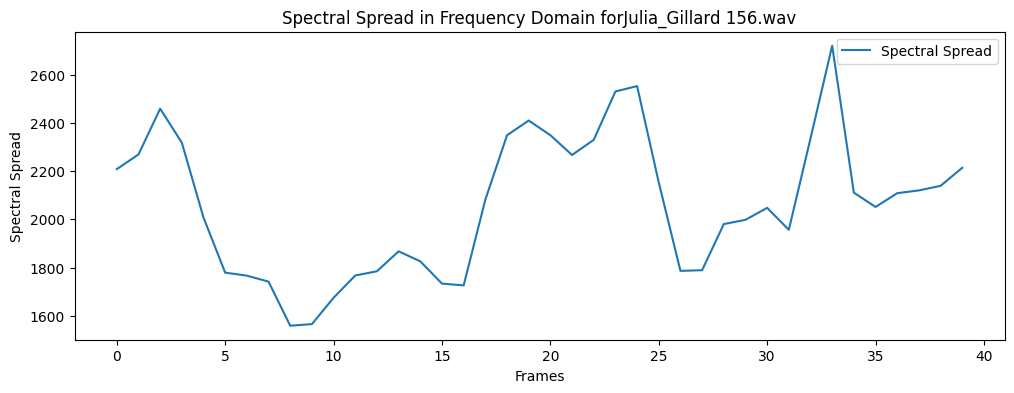

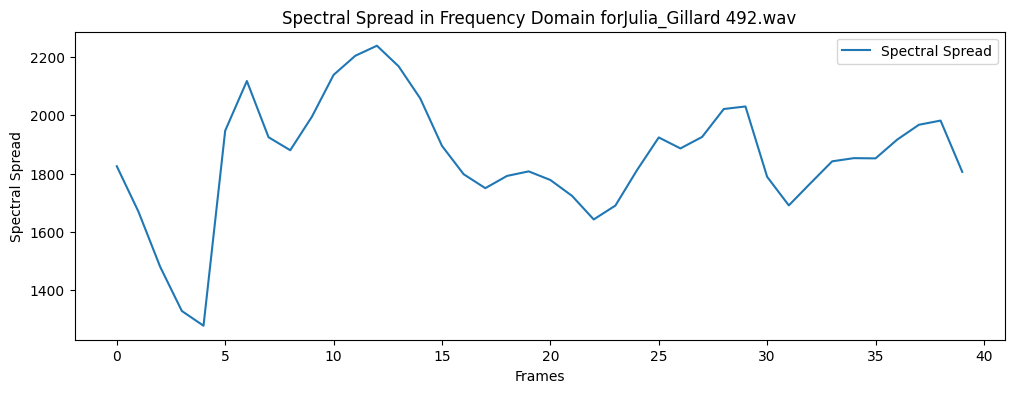

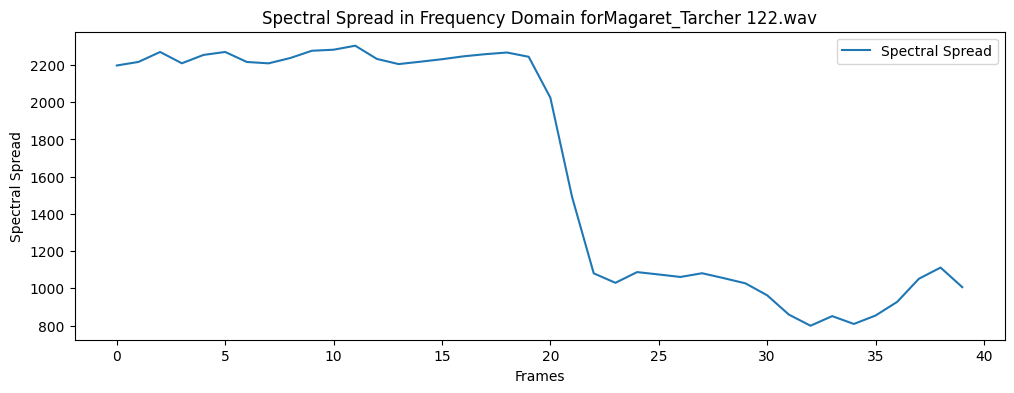

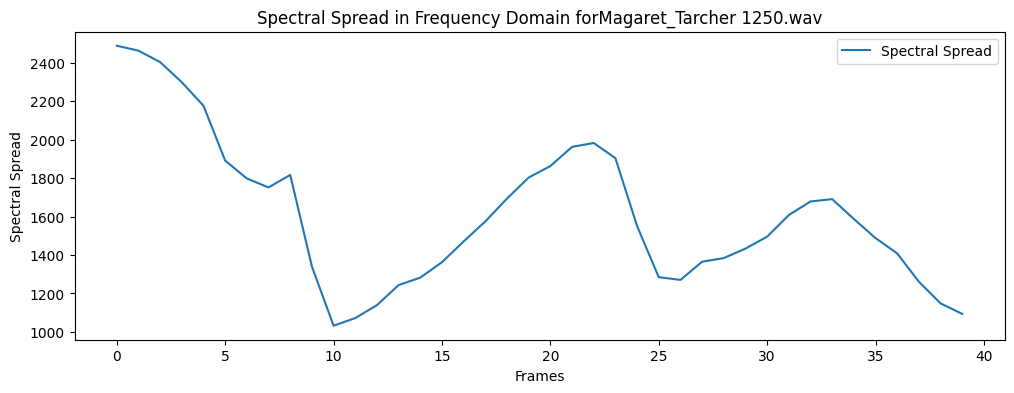

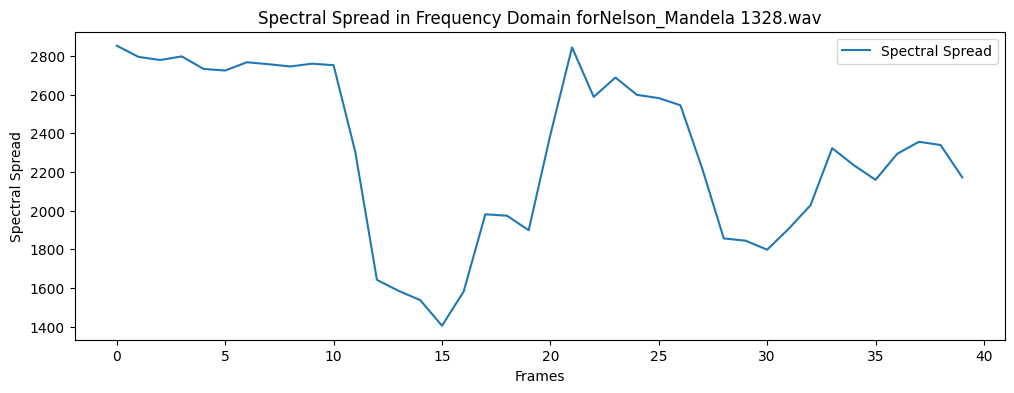

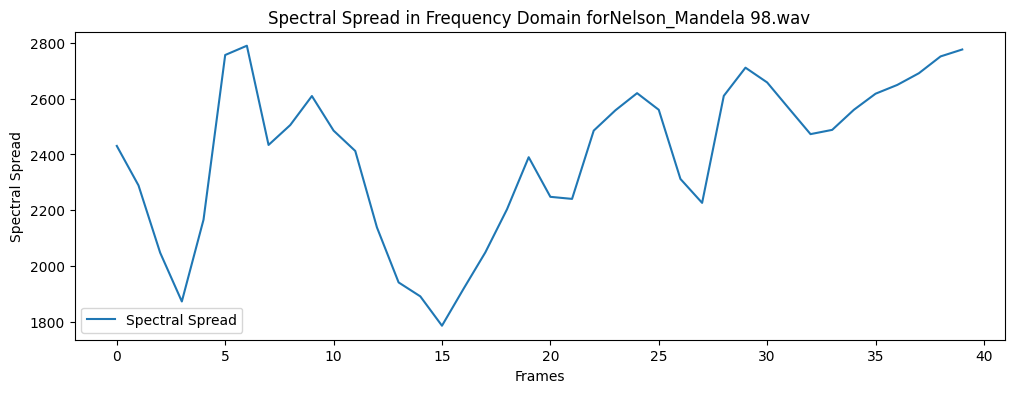

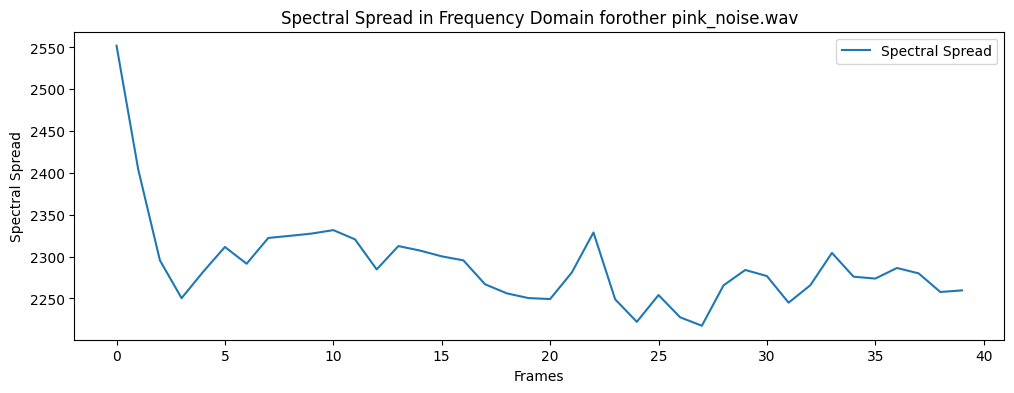

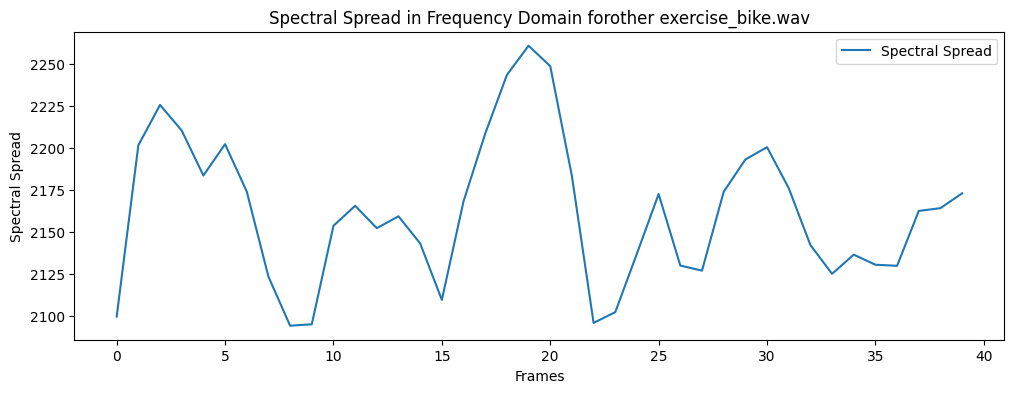

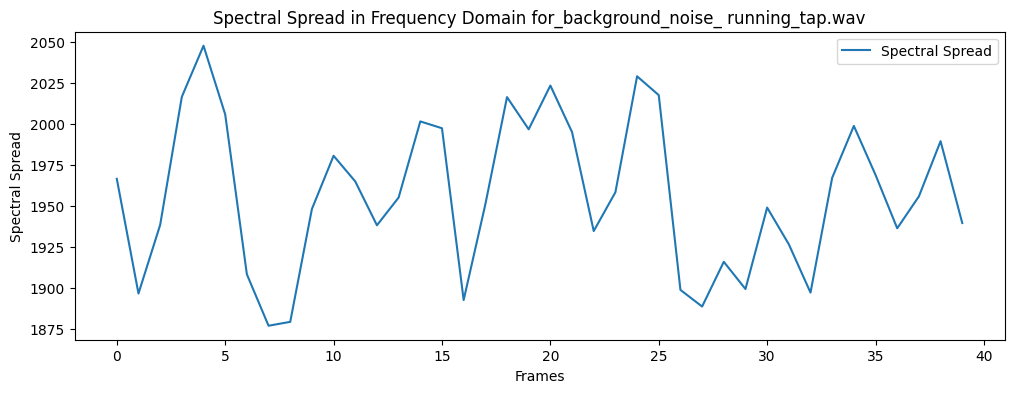

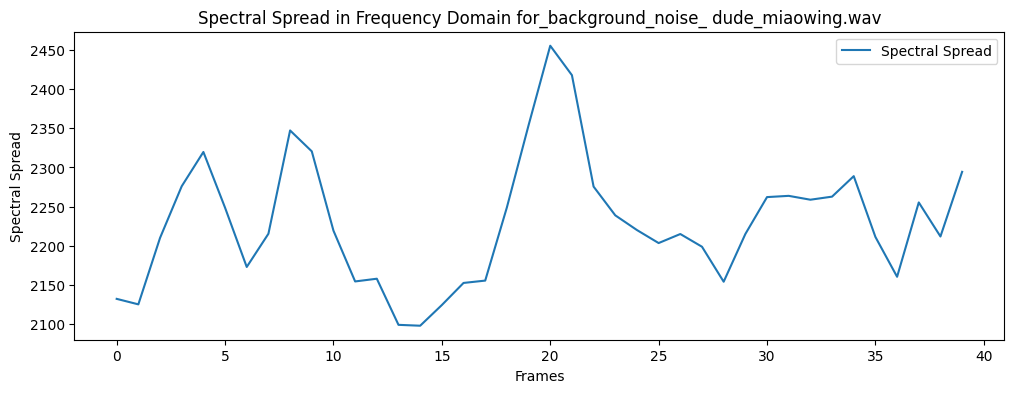

In [17]:
folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        stft = librosa.stft(y)
        magnitude = np.abs(stft)
        spectral_spread = librosa.feature.spectral_bandwidth(S=magnitude, sr=sr)

        plt.figure(figsize=(12, 4))
        plt.plot(spectral_spread[0][:40], label='Spectral Spread')
        plt.title(f'Spectral Spread in Frequency Domain for{folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('Spectral Spread')
        plt.legend()
        plt.show()


## Note onsets

### mfcc in time domain

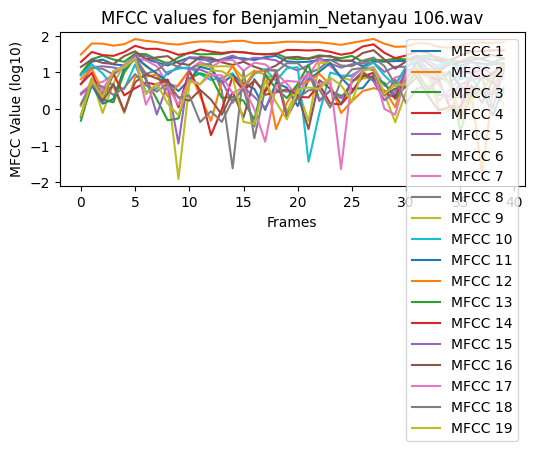

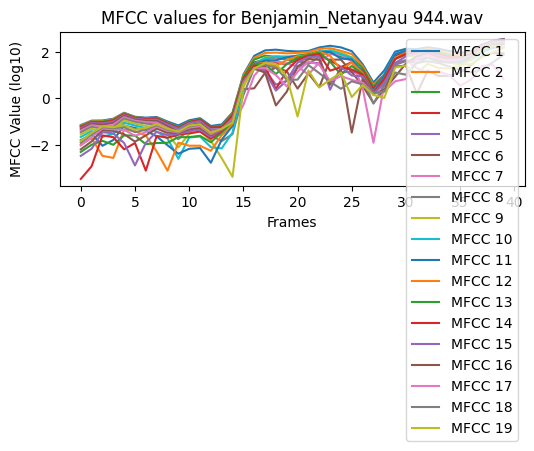

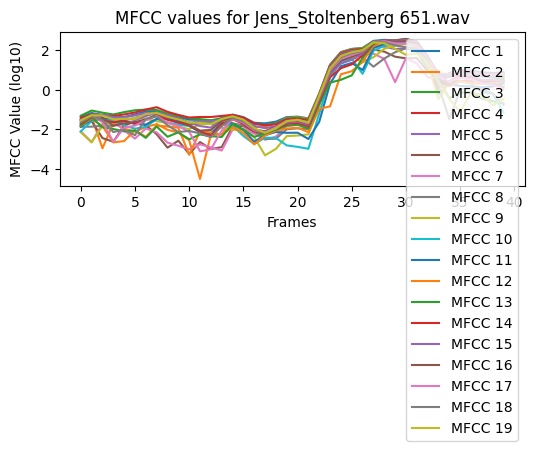

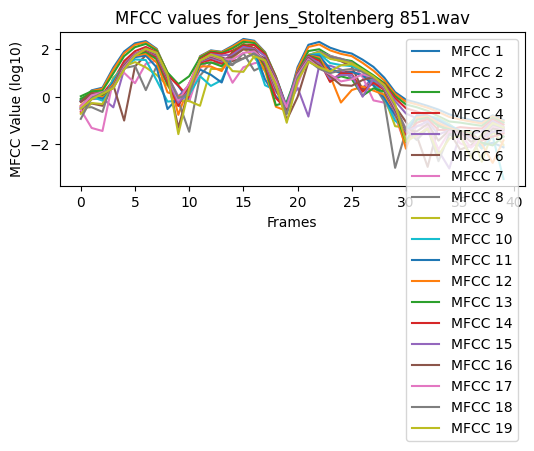

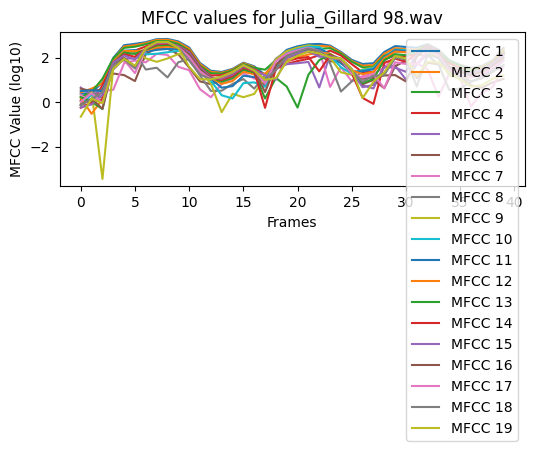

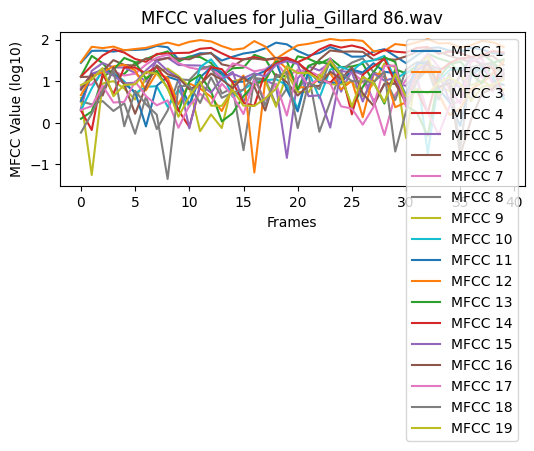

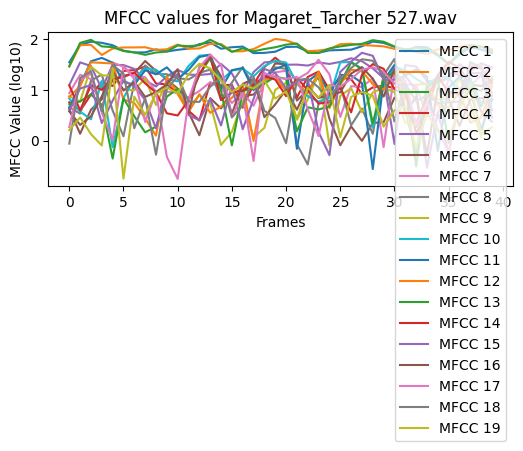

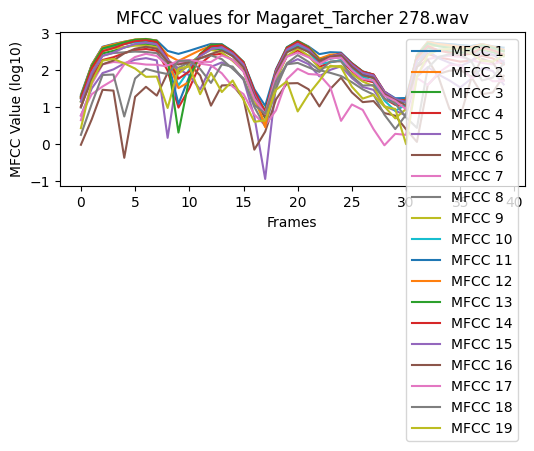

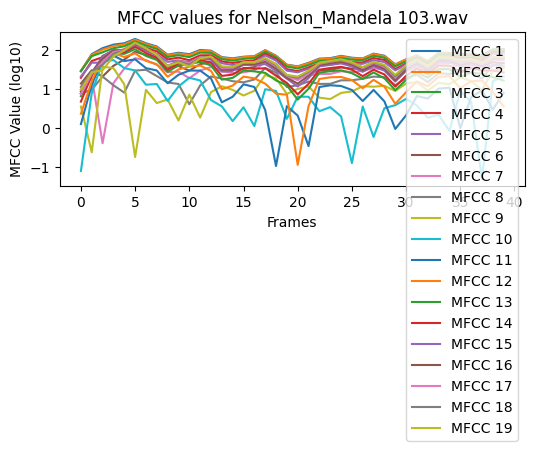

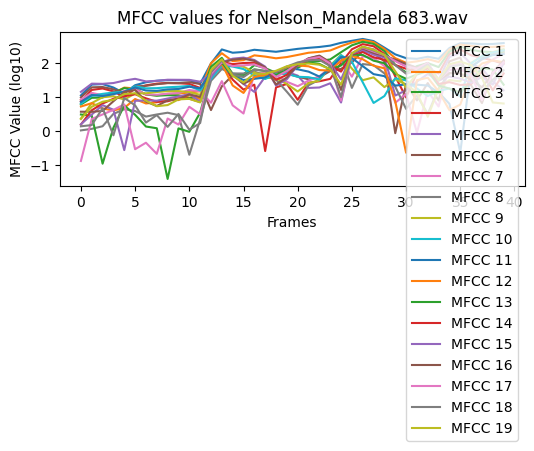

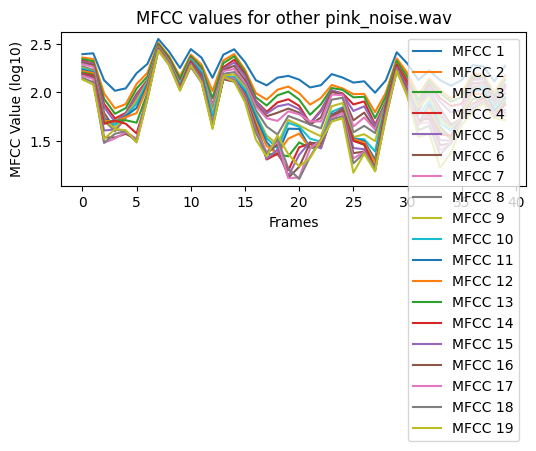

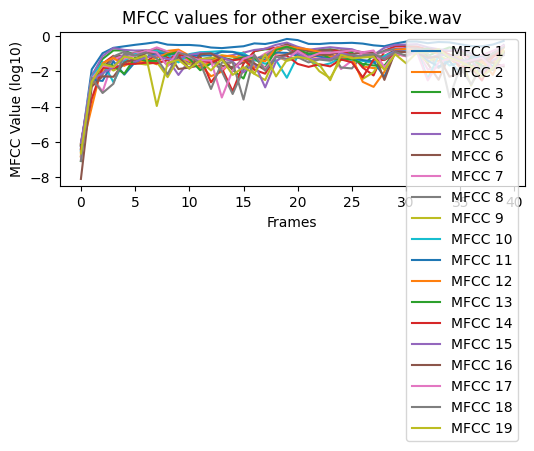

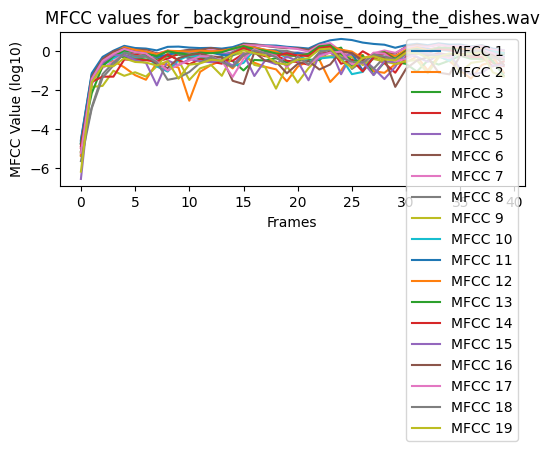

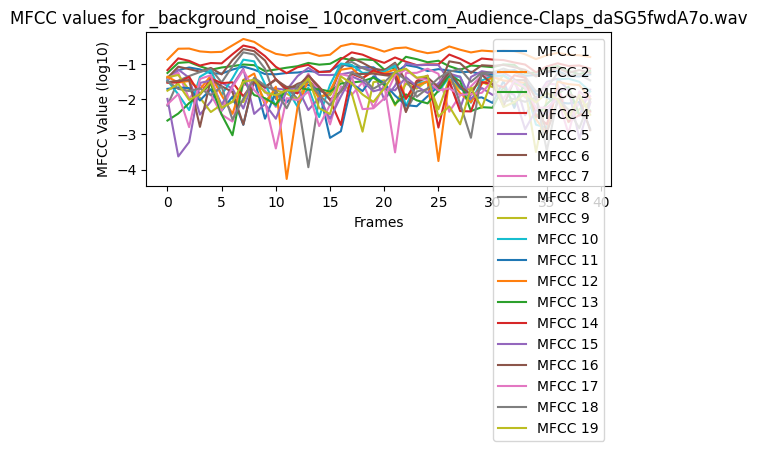

In [18]:
import random
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

for folder in folders:
    folder_path = os.path.join(audio_files_dir, folder)
    audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

    for audio_file in chosen_audios:
        audio_path = os.path.join(folder_path, audio_file)
        y, sr = librosa.load(audio_path)

        # Compute the log power spectrum
        log_power_spectrum = librosa.power_to_db(np.abs(librosa.stft(y))**2)

        # Resample the power spectrum on the mel scale
        mel_power_spectrum = librosa.feature.melspectrogram(y=y, sr=sr)

        # Compute the MFCC features
        mfcc_features = librosa.feature.mfcc(S=mel_power_spectrum)

        # Plot the MFCC values on a logarithmic scale
        plt.figure(figsize=(6, 2))
        for i in range(1, len(mfcc_features)):
            plt.plot(range(len(mfcc_features[i][:40])), np.log10(np.abs(mfcc_features[i][:40])), label='MFCC {}'.format(i))

        plt.title(f'MFCC values for {folder} {audio_file}')
        plt.xlabel('Frames')
        plt.ylabel('MFCC Value (log10)')
        plt.legend()

        plt.show()


In [19]:
# import random
# import os
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import numpy as np

# # audio_files_dir = '/path/to/audio_files_dir'
# folders = [f for f in os.listdir(audio_files_dir) if os.path.isdir(os.path.join(audio_files_dir, f))]

# for folder in folders:
#     folder_path = os.path.join(audio_files_dir, folder)
#     audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

#     chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

#     for audio_file in chosen_audios:
#         audio_path = os.path.join(folder_path, audio_file)
#         y, sr = librosa.load(audio_path)

#         # Compute the log power spectrum
#         log_power_spectrum = librosa.power_to_db(np.abs(librosa.stft(y))**2)

#         # Resample the power spectrum on the mel scale
#         mel_power_spectrum = librosa.feature.melspectrogram(y=y, sr=sr)

#         # Compute the MFCC features
#         mfcc_features = librosa.feature.mfcc(S=mel_power_spectrum)

#         # Plot the MFCC values on a logarithmic scale
#         plt.figure(figsize=(6, 2))
#         for i in range(1, len(mfcc_features)):
#             plt.plot(range(len(mfcc_features[i][:40])), np.log10(np.abs(mfcc_features[i][:40])), label='MFCC {}'.format(i))

#         plt.title(f'MFCC values for {folder} {audio_file}')
#         plt.xlabel('Frames')
#         plt.ylabel('MFCC Value (log10)')
#         plt.legend()

#         plt.show()


In [20]:
# Check the version of Librosa
librosa_version = librosa.__version__

# Upgrade Librosa if necessary
if librosa_version < '0.10.0':
    print('Upgrading Librosa to version 0.10.0...')
    os.system('pip install librosa --upgrade')


In [21]:
print(audio_files_dir)

archive\16000_pcm_speeches


In [22]:
# import librosa
# import numpy as np
# import matplotlib.pyplot as plt

# def compute_mfcc_features(y, sr):
#     # Preemphasis filter
#     preemphasis_coeff = 0.95

#     # Preemphasize the signal
#     y_preemphasized = librosa.core.apply_preemphasis(y, sr=sr, preemph=preemphasis_coeff)

#     # Window length in samples
#     win_length = 256

#     # Hop length in samples
#     hop_length = 128

#     # Compute the mel-spectrogram
#     S = librosa.feature.melspectrogram(y_preemphasized, sr=sr, n_fft=1024, hop_length=hop_length, win_length=win_length)

#     # Number of mel filters
#     n_mels = 128

#     # Compute the mel filter bank
#     mel_basis = librosa.filters.mel(sr, n_mels=n_mels)

#     # Compute the log mel-spectrogram
#     log_S = librosa.core.amplitude_to_db(S, ref=np.max)

#     # Discrete cosine transform (DCT)
#     mfcc = librosa.core.dct(log_S, axis=1, norm='ortho')

#     # The first 12 MFCC coefficients are typically used for speech recognition.
#     mfcc_features = mfcc[:12]

#     return mfcc_features



# for entry in os.scandir(audio_files_dir):
#     folder_path = os.path.join(audio_files_dir, folder)
#     audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

#     chosen_audios = random.sample(audio_files, min(2, len(audio_files)))

#     for audio_file in chosen_audios:
#         audio_path = os.path.join(audio_files_dir, audio_file)

#         y, sr = librosa.load(audio_path)
#         mfcc_features = compute_mfcc_features(y, sr)



## Chroma density in time domain

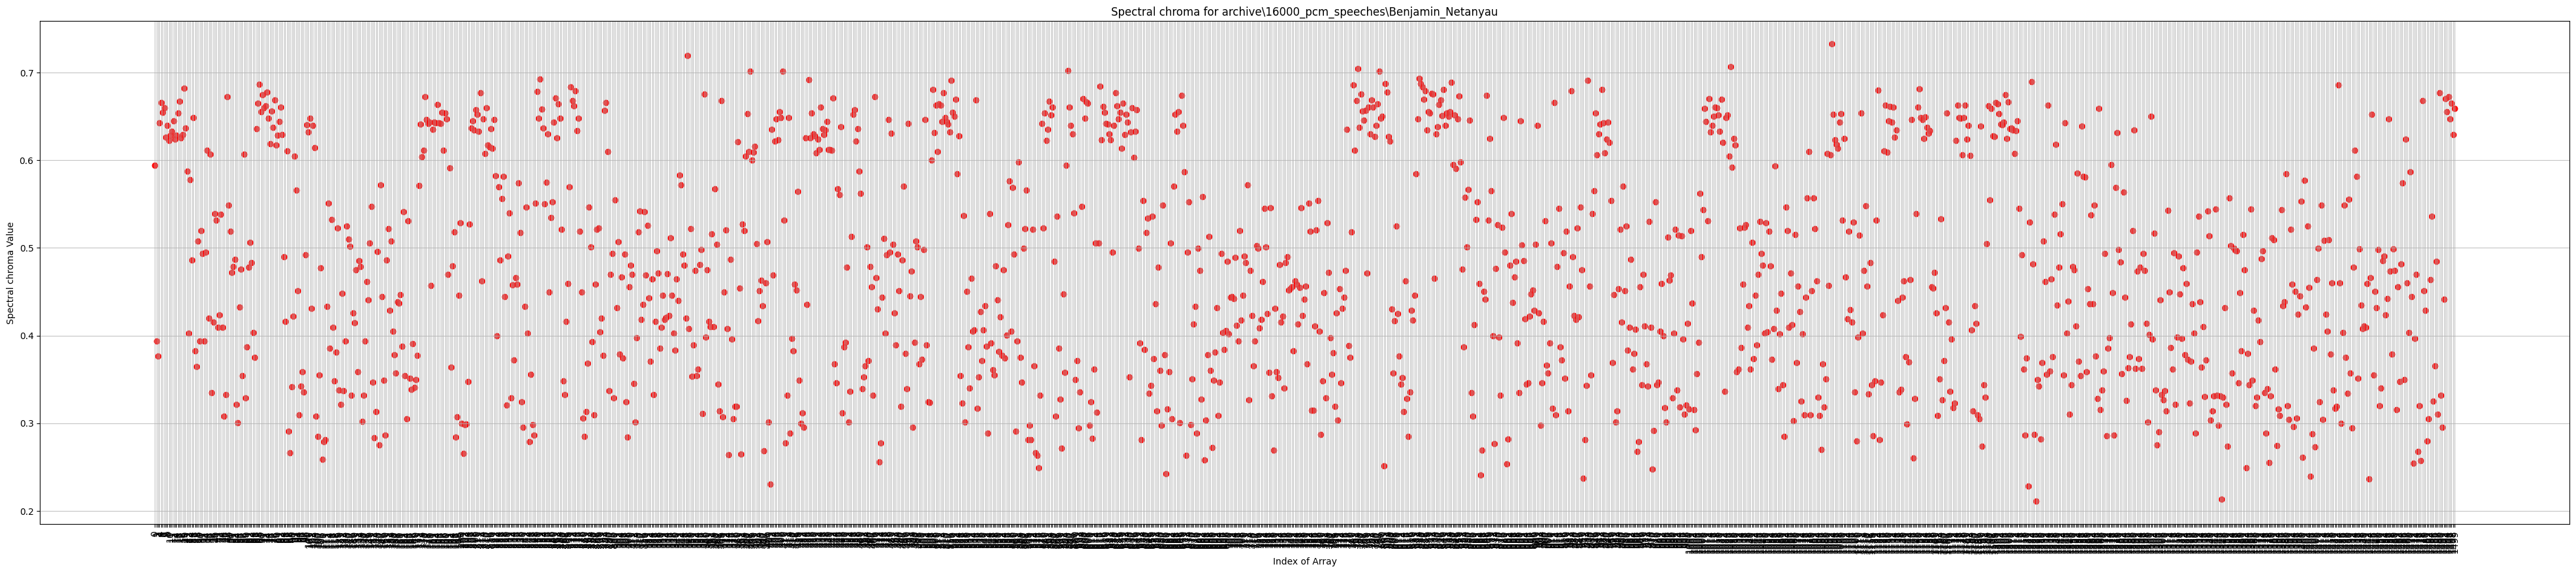

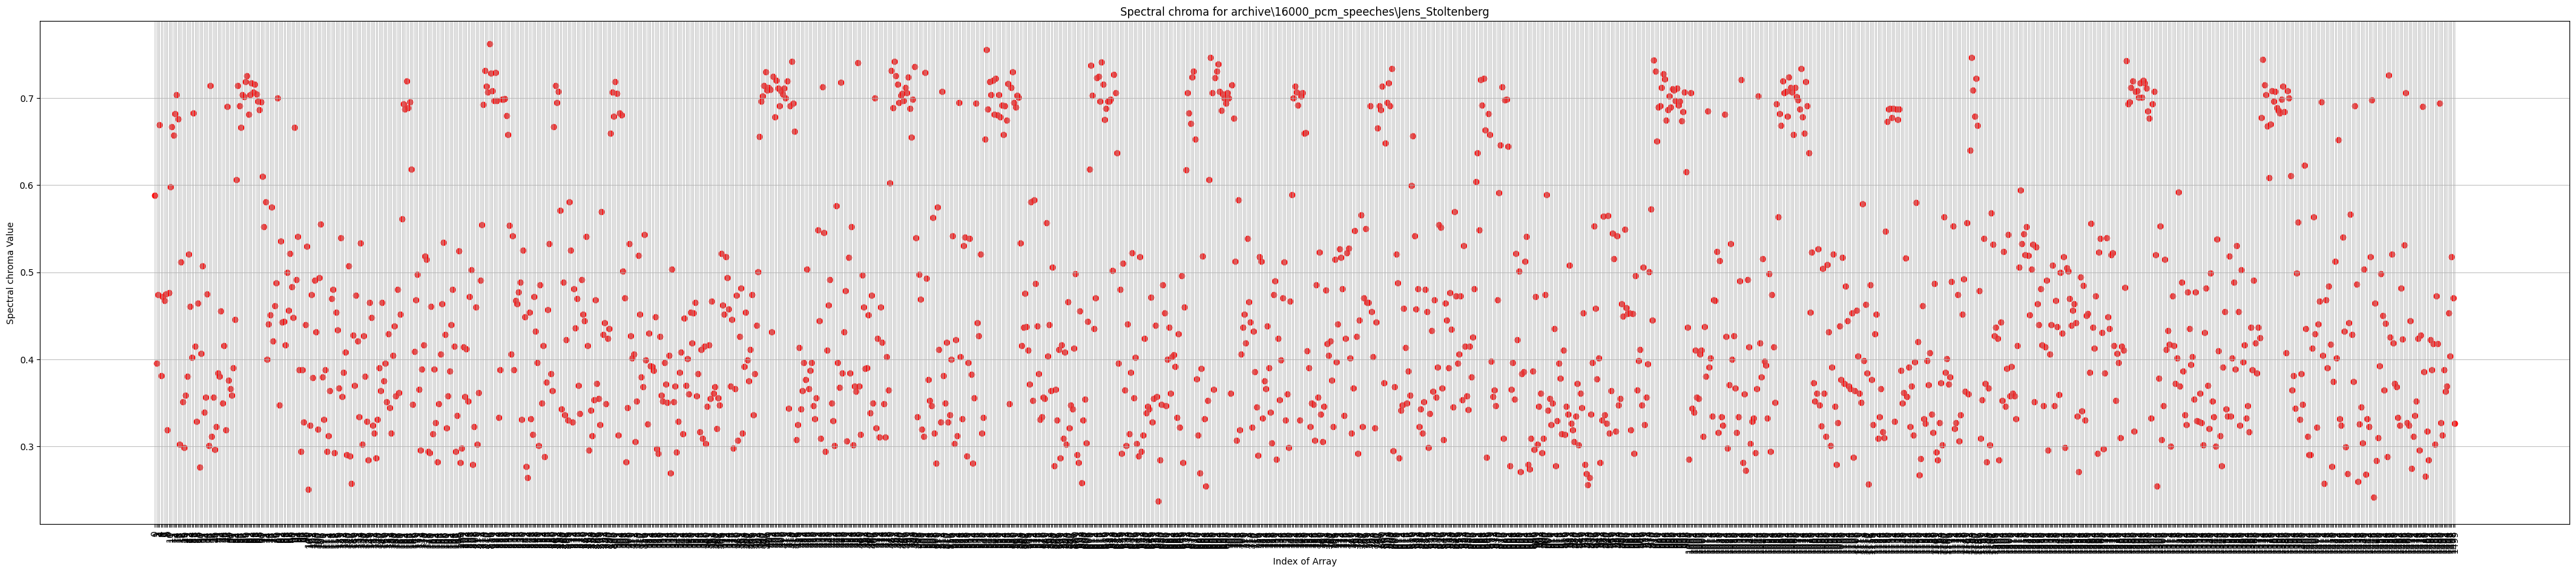

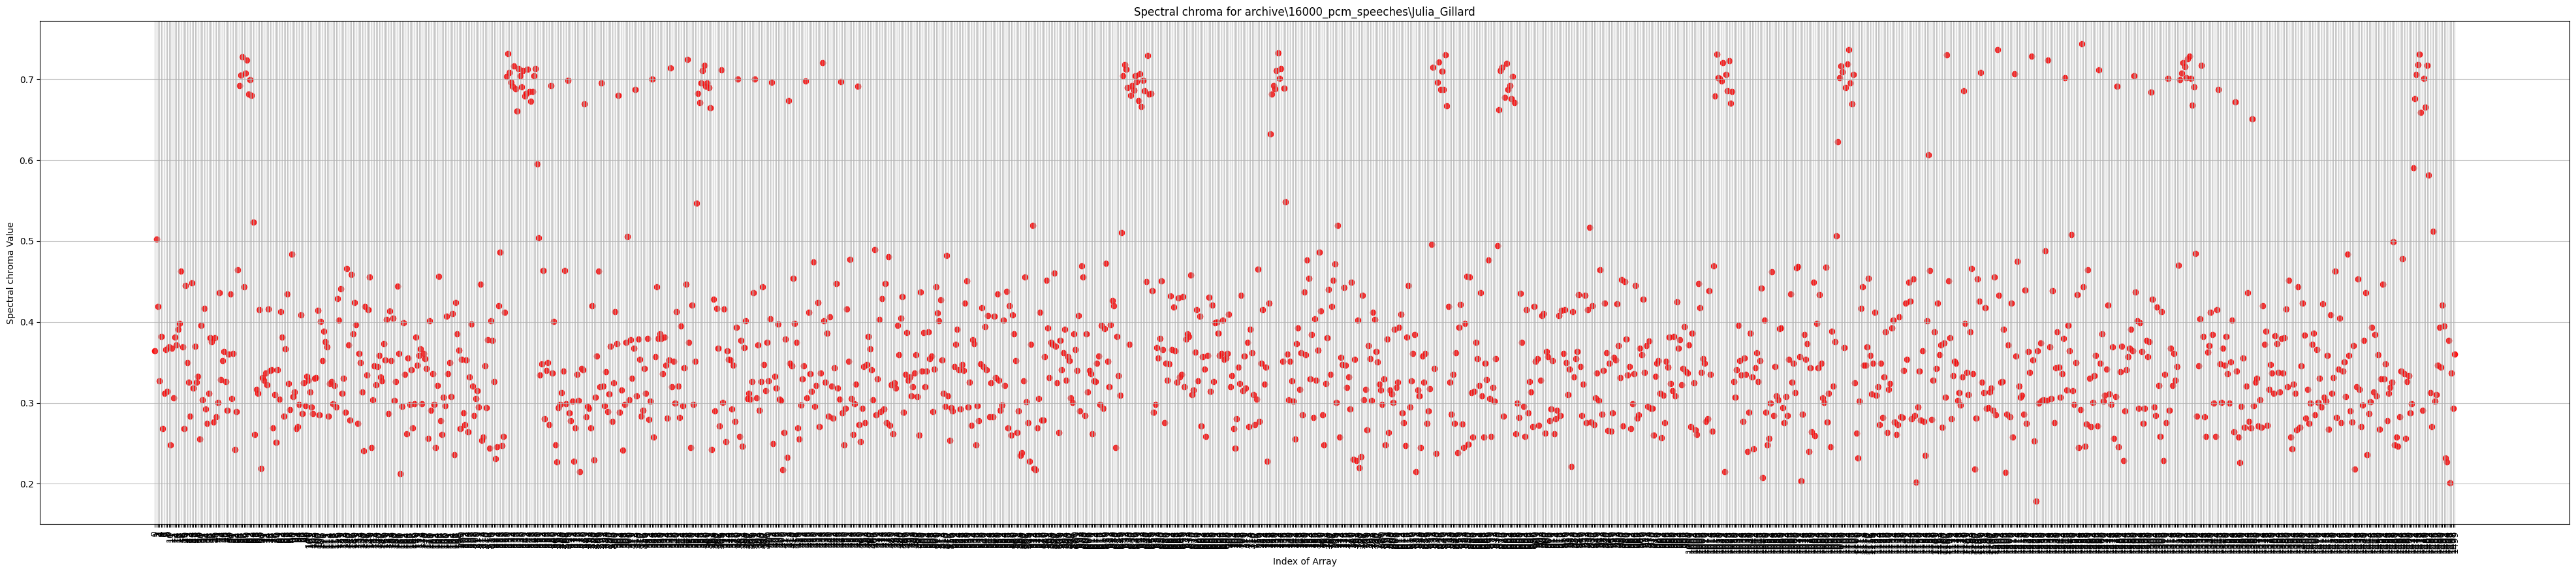

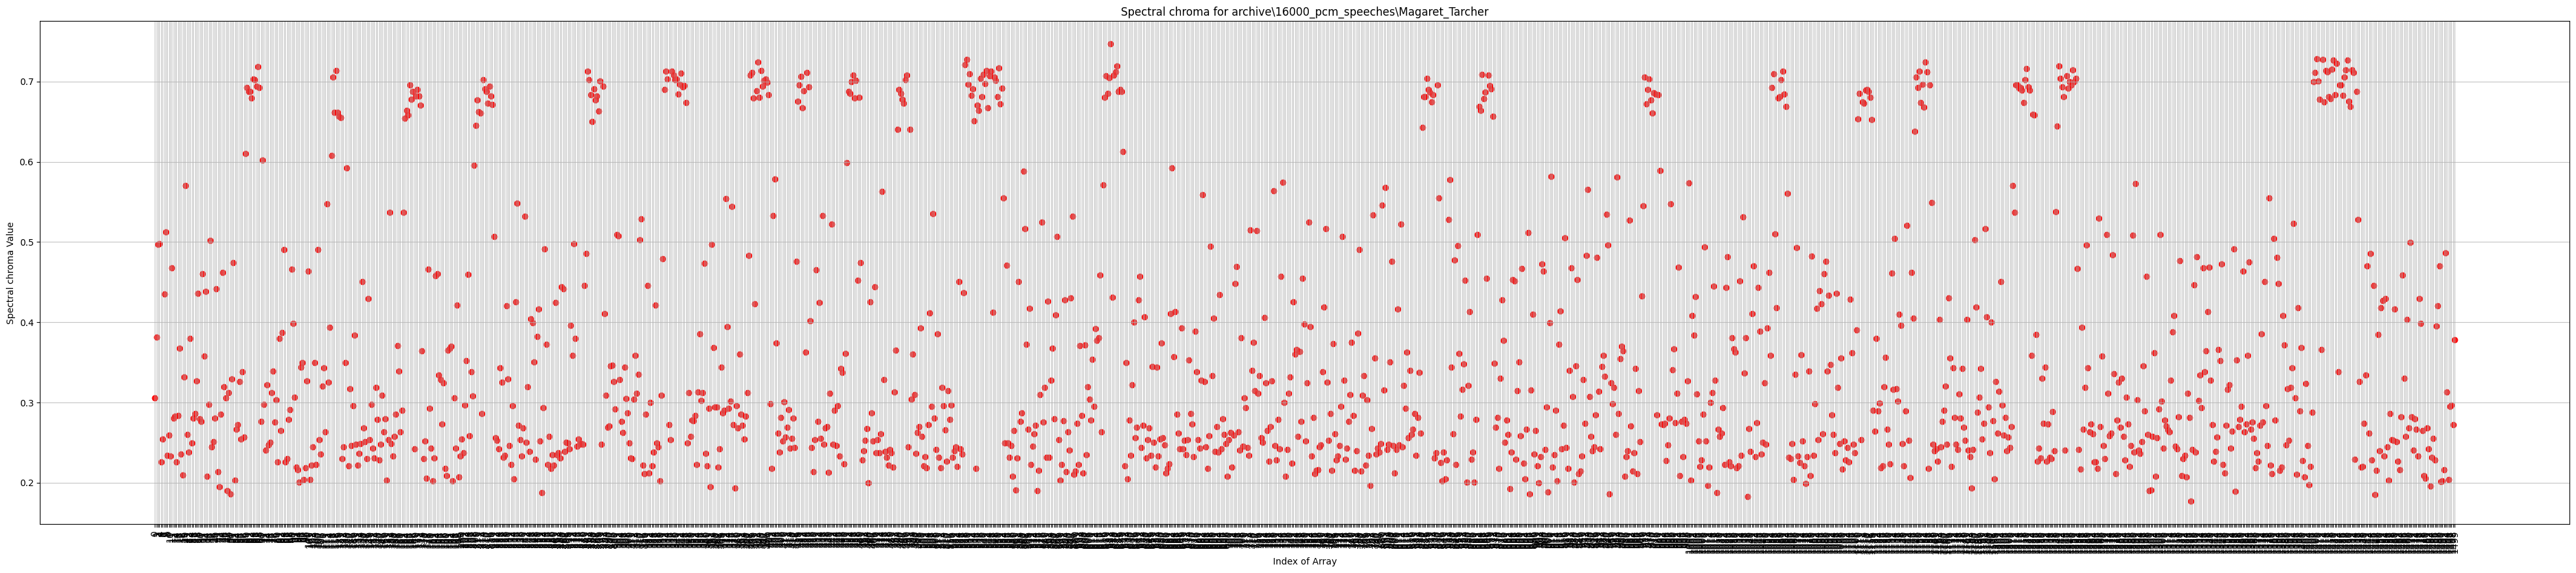

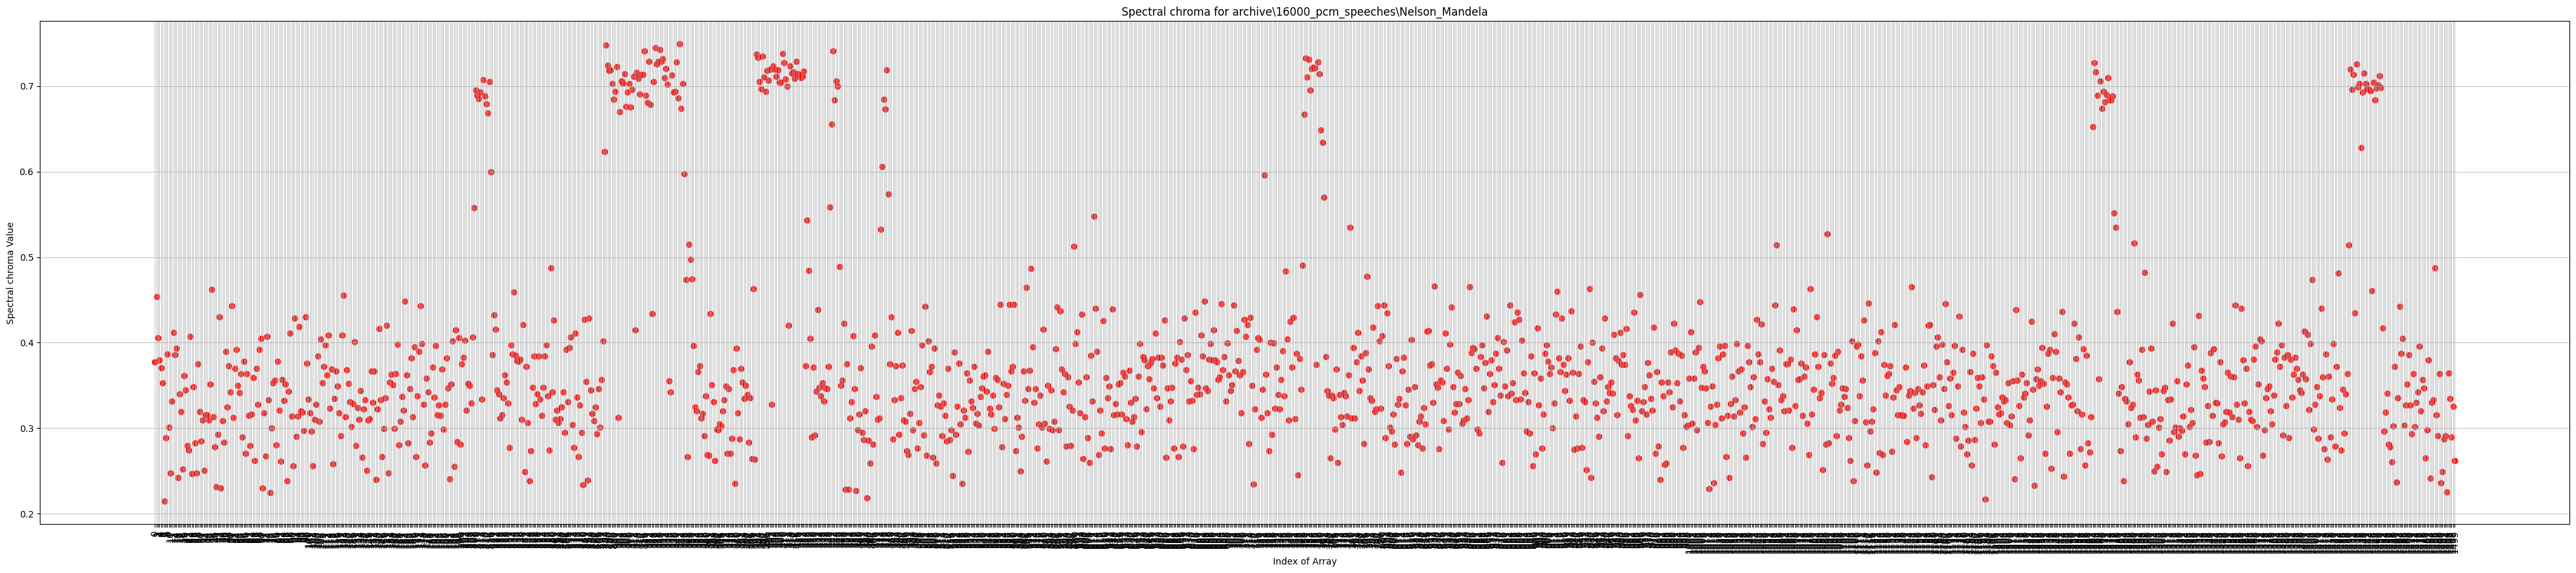

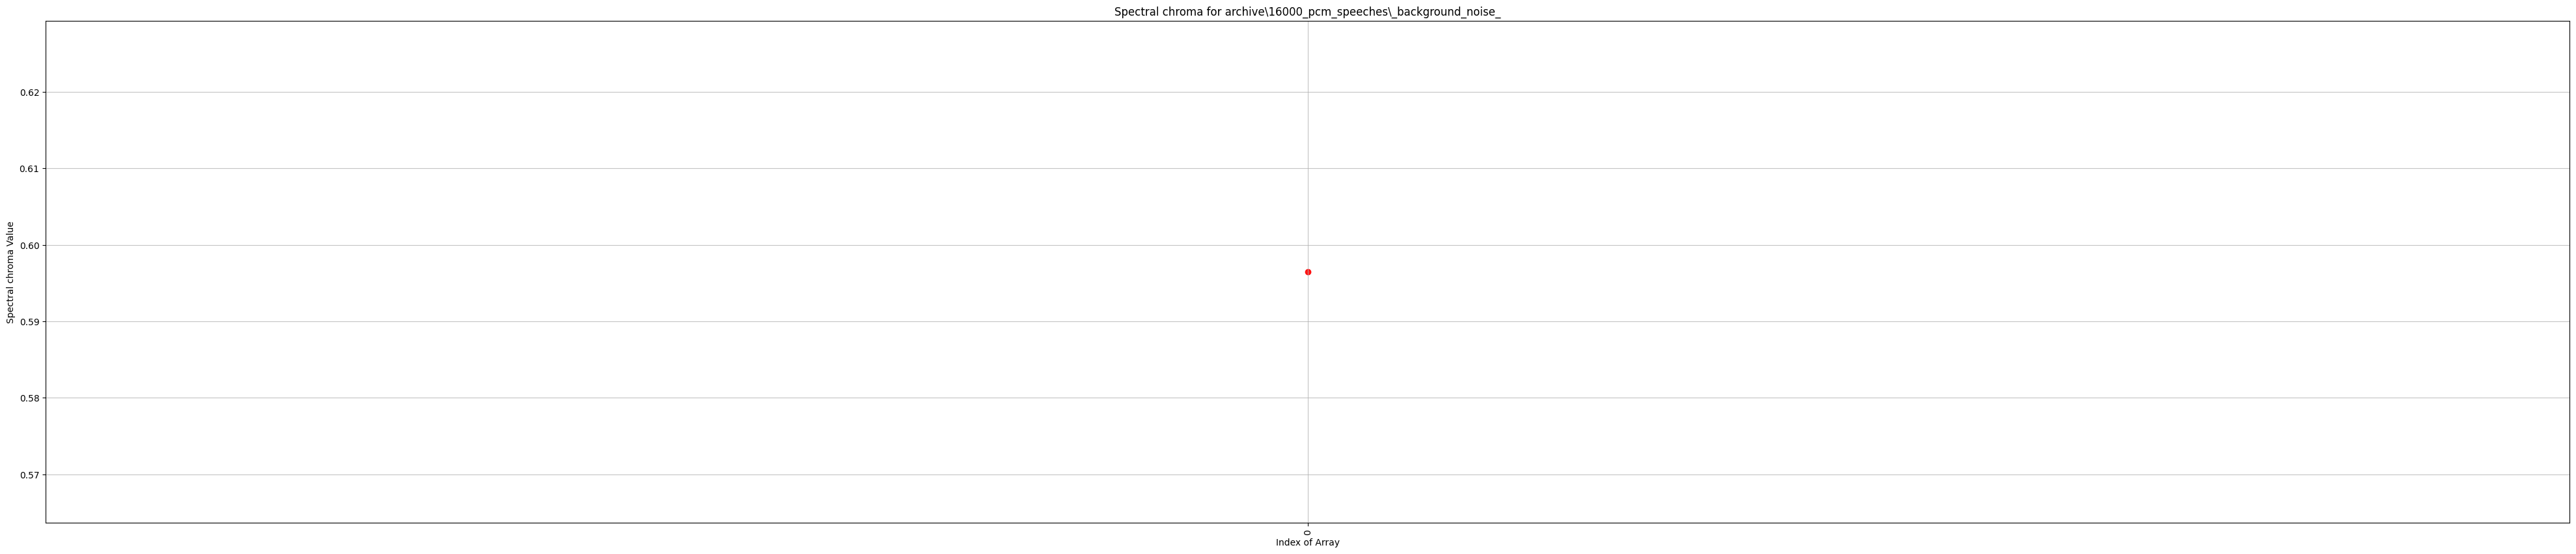

In [23]:
def plot_chroma_for_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        chroma_values = []
        file_indices = []

        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                data, sr = librosa.load(file_path, sr=None)

                chroma = librosa.feature.chroma_stft(y=data, sr=sr)
                mean_chroma = chroma.mean()
                match = re.match(r'(\d+)', file)
                if match:
                    file_index = int(match.group(1))
                    file_indices.append(file_index)
                    chroma_values.append(mean_chroma)
        # chroma_values = chroma_values[:700] 
        if chroma_values:
            plt.figure(figsize=(50, 10))
            plt.scatter(range(len(chroma_values)), chroma_values, color='r', alpha=0.9)  # Using scatter plot
            plt.title(f'Spectral chroma for {root}')
            plt.xlabel('Index of Array')
            plt.ylabel('Spectral chroma Value')
            plt.xticks(range(len(chroma_values)), range(len(chroma_values)), rotation=90)
            plt.grid(axis='both', alpha=0.75) 
            plt.show()

for entry in os.scandir(audio_files_dir):
    if entry.is_dir():
        plot_chroma_for_folder(entry.path)


In [24]:
from scipy.stats import pearsonr
